In [1]:
# Libraries
import anndata as ad
import matplotlib as plt
import numpy as np
import pandas as pd
import sc_atlas_helpers as ah
import scanpy as sc
from matplotlib.pyplot import rc_context
from scipy.stats import median_abs_deviation

In [2]:
from functools import partial

import altair as alt

In [3]:
import seaborn as sns

In [4]:
import decoupler as dc

In [5]:
order_list = ['MPEC_Progenitor',
 'MPEC_Intermediate',
 'MPEC_Effector',
 'SLEC_Plastic',
 'SLEC_Progenitor',
 'SLEC_Intermediate',
 'SLEC_Ifn',
 'SLEC_Effector',
 'SLEC_Terminal']

In [6]:
adata = sc.read_h5ad("adata_neighbors.h5ad")

In [7]:
df = adata.obs#
origin_counts = df.groupby('condition')['sample_id'].nunique().reset_index()
origin_counts.columns = ['condition', 'count']

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df_num = adata.obs[["sample_id","condition","cell_type","cell_type2"]].value_counts()

In [10]:
df_num

sample_id     condition  cell_type            cell_type2
10mix_ICI1    10mix      Tex_eff              SLEC5         2093
11mix_ICI1    11mix      Tex_eff              SLEC5         2034
GF_ICI2_plus  GF         Tex_eff              SLEC5         1758
11mix_ICI2    11mix      Tex_eff              SLEC5         1479
11mix_ICI1    11mix      Interferon_response  SLEC4         1388
                                                            ... 
10mix_ICI1    10mix      Plastic              SLEC1           74
GF_ICI1       GF         Plastic              SLEC1           71
GF_ICI2_plus  GF         Tex_term             SLEC6           68
GF_ICI1_plus  GF         Plastic              SLEC1           61
GF_ICI2       GF         Tex_term             SLEC6           59
Length: 72, dtype: int64

In [11]:
df_num = df_num.to_frame()

In [12]:
df_num = df_num.reset_index()

In [13]:
df_num = df_num.rename(columns={0:"cell_count"})

In [14]:
df_num["cell_type"].replace('Interferon_response', 'SLEC_Ifn', inplace=True)
df_num["cell_type"].replace('Plastic', 'SLEC_Plastic', inplace=True)
df_num["cell_type"].replace('Tex_eff', 'SLEC_Effector', inplace=True)
df_num["cell_type"].replace('Tex_int', 'SLEC_Intermediate', inplace=True)
df_num["cell_type"].replace('Tex_prog', 'SLEC_Progenitor', inplace=True) 
df_num["cell_type"].replace('Tex_term', 'SLEC_Terminal', inplace=True)
df_num["cell_type"].replace('MPEC1', 'MPEC_Progenitor', inplace=True)
df_num["cell_type"].replace('MPEC2', 'MPEC_Intermediate', inplace=True)
df_num["cell_type"].replace('MPEC3', 'MPEC_Effector', inplace=True)


In [15]:
adata.obs["cell_type"].replace('Interferon_response', 'SLEC_Ifn', inplace=True)
adata.obs["cell_type"].replace('Plastic', 'SLEC_Plastic', inplace=True)
adata.obs["cell_type"].replace('Tex_eff', 'SLEC_Effector', inplace=True)
adata.obs["cell_type"].replace('Tex_int', 'SLEC_Intermediate', inplace=True)
adata.obs["cell_type"].replace('Tex_prog', 'SLEC_Progenitor', inplace=True) 
adata.obs["cell_type"].replace('Tex_term', 'SLEC_Terminal', inplace=True)
adata.obs["cell_type"].replace('MPEC1', 'MPEC_Progenitor', inplace=True)
adata.obs["cell_type"].replace('MPEC2', 'MPEC_Intermediate', inplace=True)
adata.obs["cell_type"].replace('MPEC3', 'MPEC_Effector', inplace=True)



In [16]:
df_num

sample_id condition      cell_type cell_type2  cell_count
0     10mix_ICI1     10mix  SLEC_Effector      SLEC5        2093
1     11mix_ICI1     11mix  SLEC_Effector      SLEC5        2034
2   GF_ICI2_plus        GF  SLEC_Effector      SLEC5        1758
3     11mix_ICI2     11mix  SLEC_Effector      SLEC5        1479
4     11mix_ICI1     11mix       SLEC_Ifn      SLEC4        1388
..           ...       ...            ...        ...         ...
67    10mix_ICI1     10mix   SLEC_Plastic      SLEC1          74
68       GF_ICI1        GF   SLEC_Plastic      SLEC1          71
69  GF_ICI2_plus        GF  SLEC_Terminal      SLEC6          68
70  GF_ICI1_plus        GF   SLEC_Plastic      SLEC1          61
71       GF_ICI2        GF  SLEC_Terminal      SLEC6          59

[72 rows x 5 columns]

In [18]:
df_num['total_cell_count'] = df_num.groupby('condition')['cell_count'].transform('sum')

# Calculate the cell fraction
df_num['cell_fraction'] = df_num['cell_count'] / df_num['total_cell_count']

In [19]:
df_num.to_csv("df_num.csv")

In [17]:
set(df_num.cell_type)

{'MPEC_Effector',
 'MPEC_Intermediate',
 'MPEC_Progenitor',
 'SLEC_Effector',
 'SLEC_Ifn',
 'SLEC_Intermediate',
 'SLEC_Plastic',
 'SLEC_Progenitor',
 'SLEC_Terminal'}

In [18]:
set(adata.obs["cell_type"])

{'MPEC_Effector',
 'MPEC_Intermediate',
 'MPEC_Progenitor',
 'SLEC_Effector',
 'SLEC_Ifn',
 'SLEC_Intermediate',
 'SLEC_Plastic',
 'SLEC_Progenitor',
 'SLEC_Terminal'}

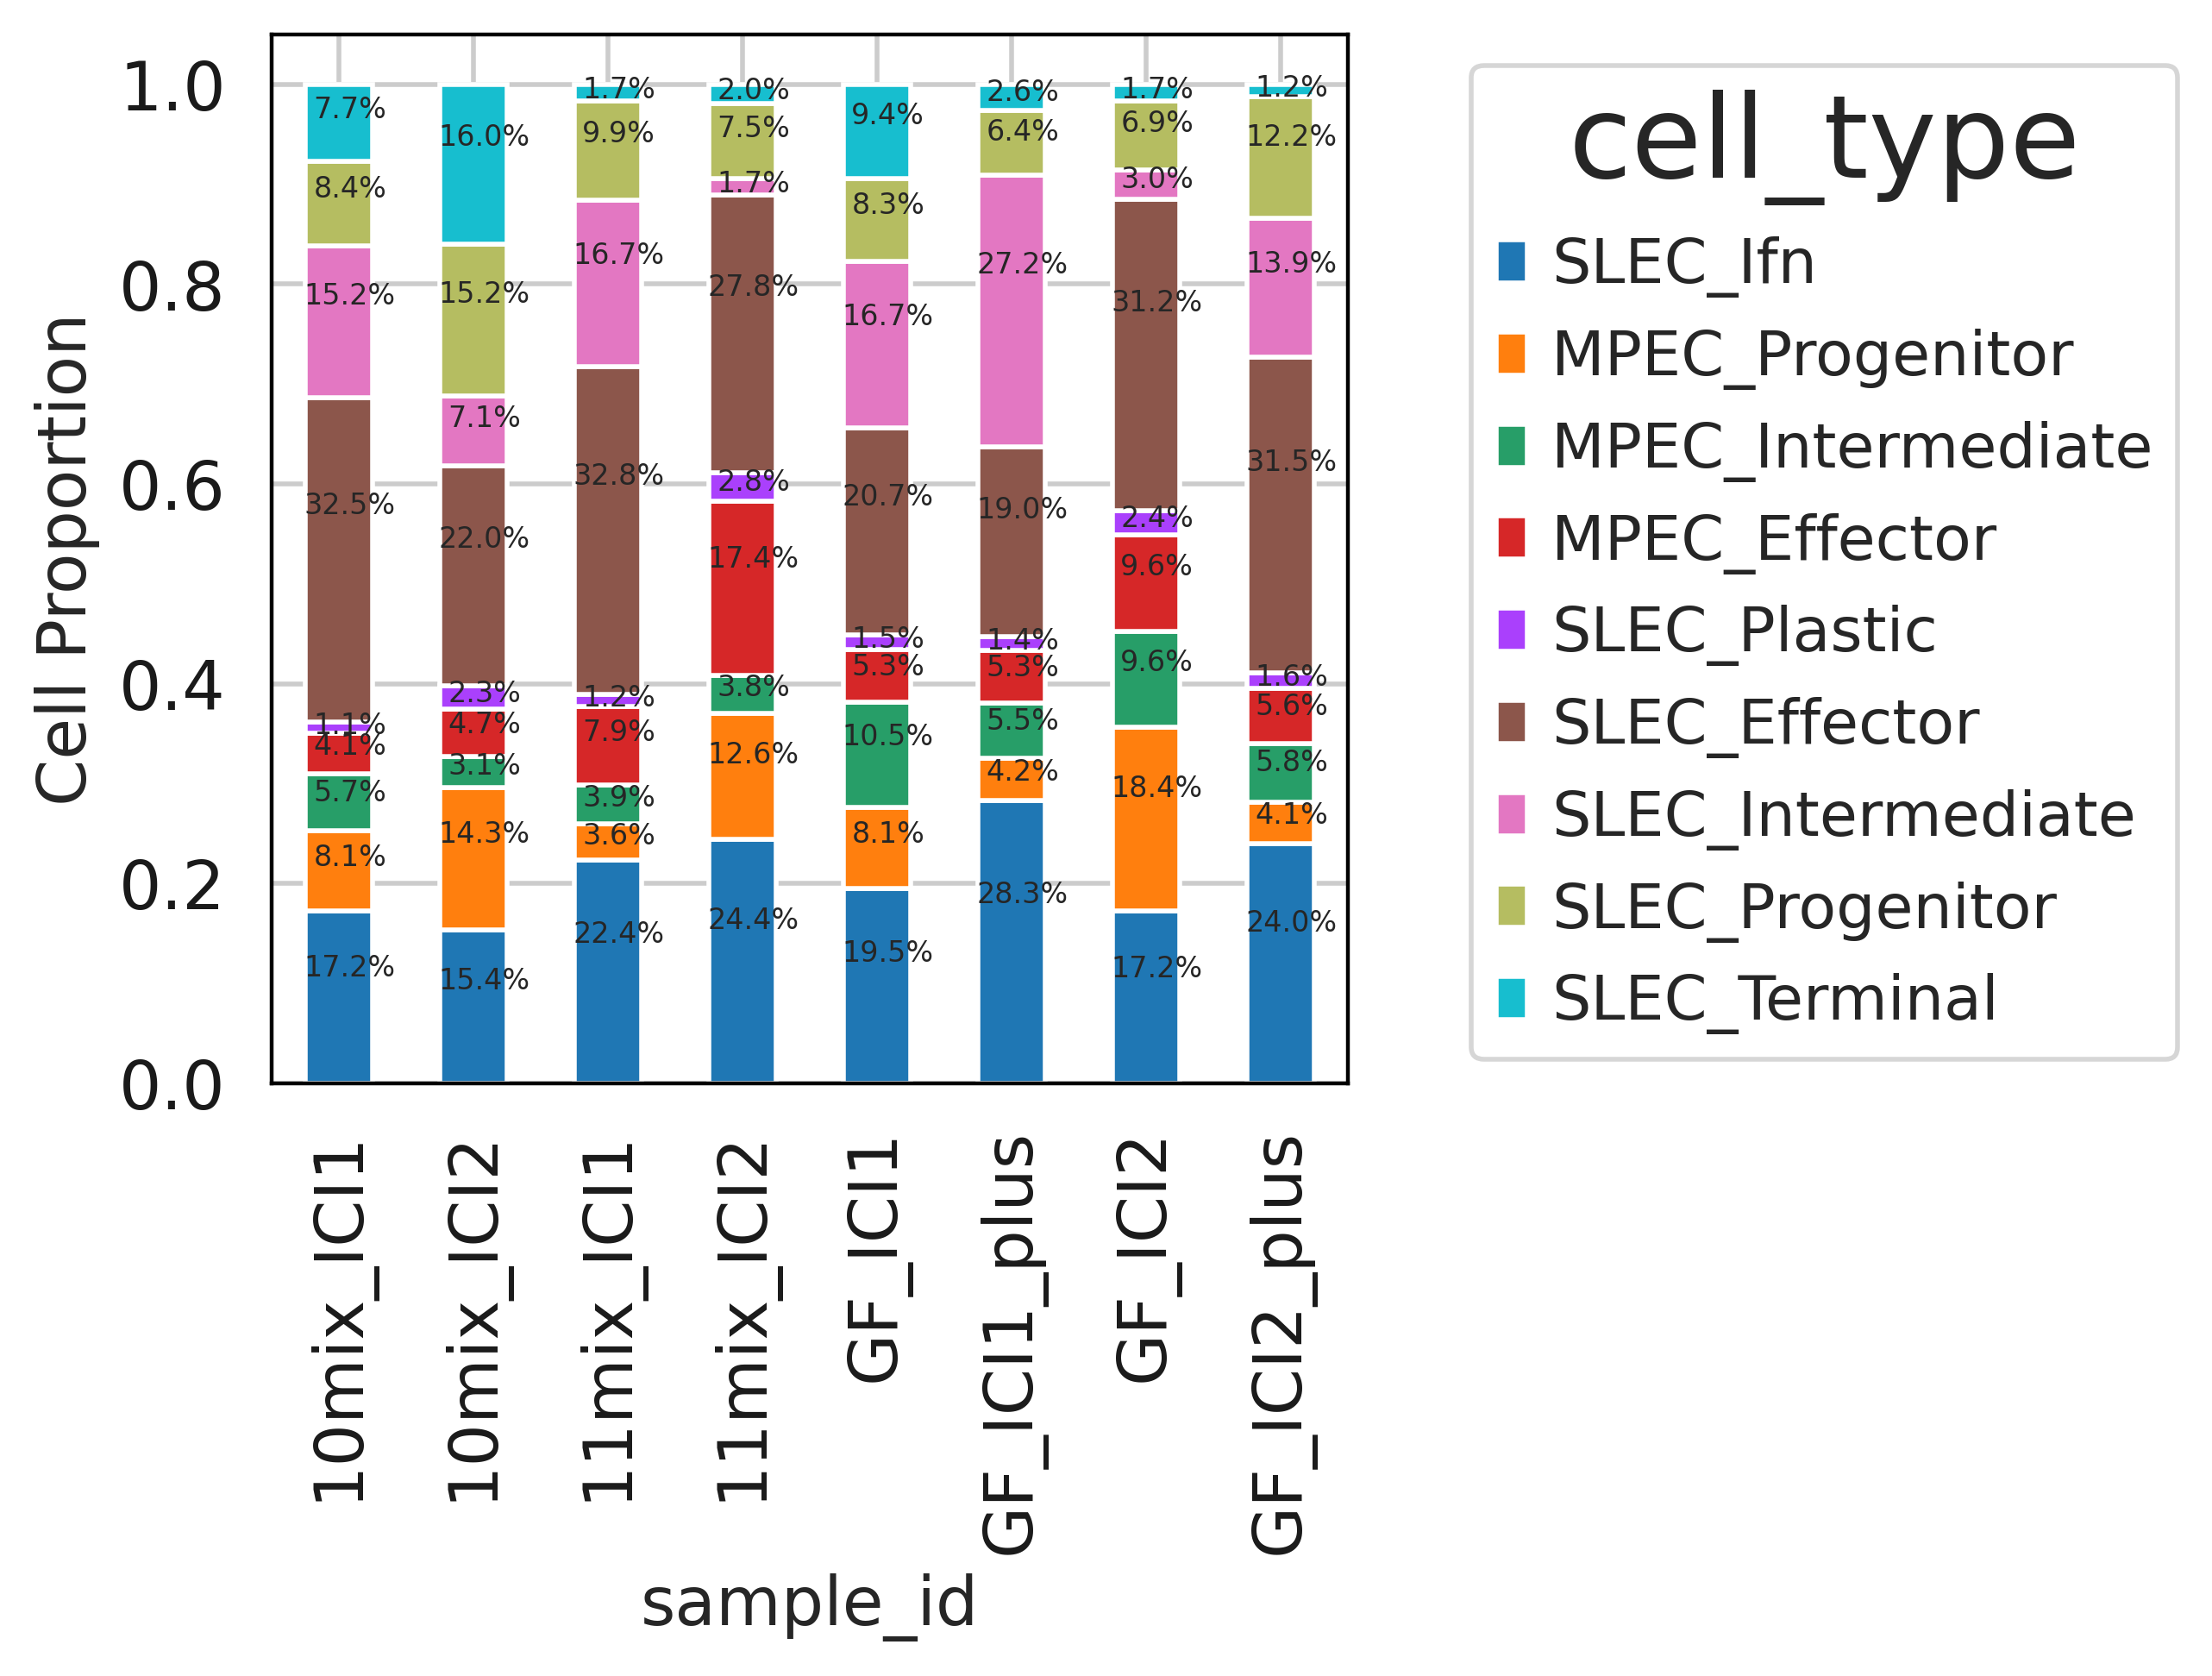

In [20]:
tmp = pd.crosstab(adata.obs['cell_type'], adata.obs['sample_id'], normalize='columns').T

# Plotting the stacked barplot
ax = tmp.plot(kind='bar', stacked=True, legend=False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 1.5, y + height / 1.5, f'{height:.01%}', ha='center', va='center', size=6)
    #ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')

# Adjusting legend
ax.legend(title='cell_type', bbox_to_anchor=(1.8,1), loc='upper right')
# Adding y-axis label
ax.set_ylabel('Cell Proportion')


#plt.tight_layout()

# Save the plot
#plt.savefig('stacked_barplot_with_percentages.png', bbox_inches='tight')
# Show the plot
plt.show()

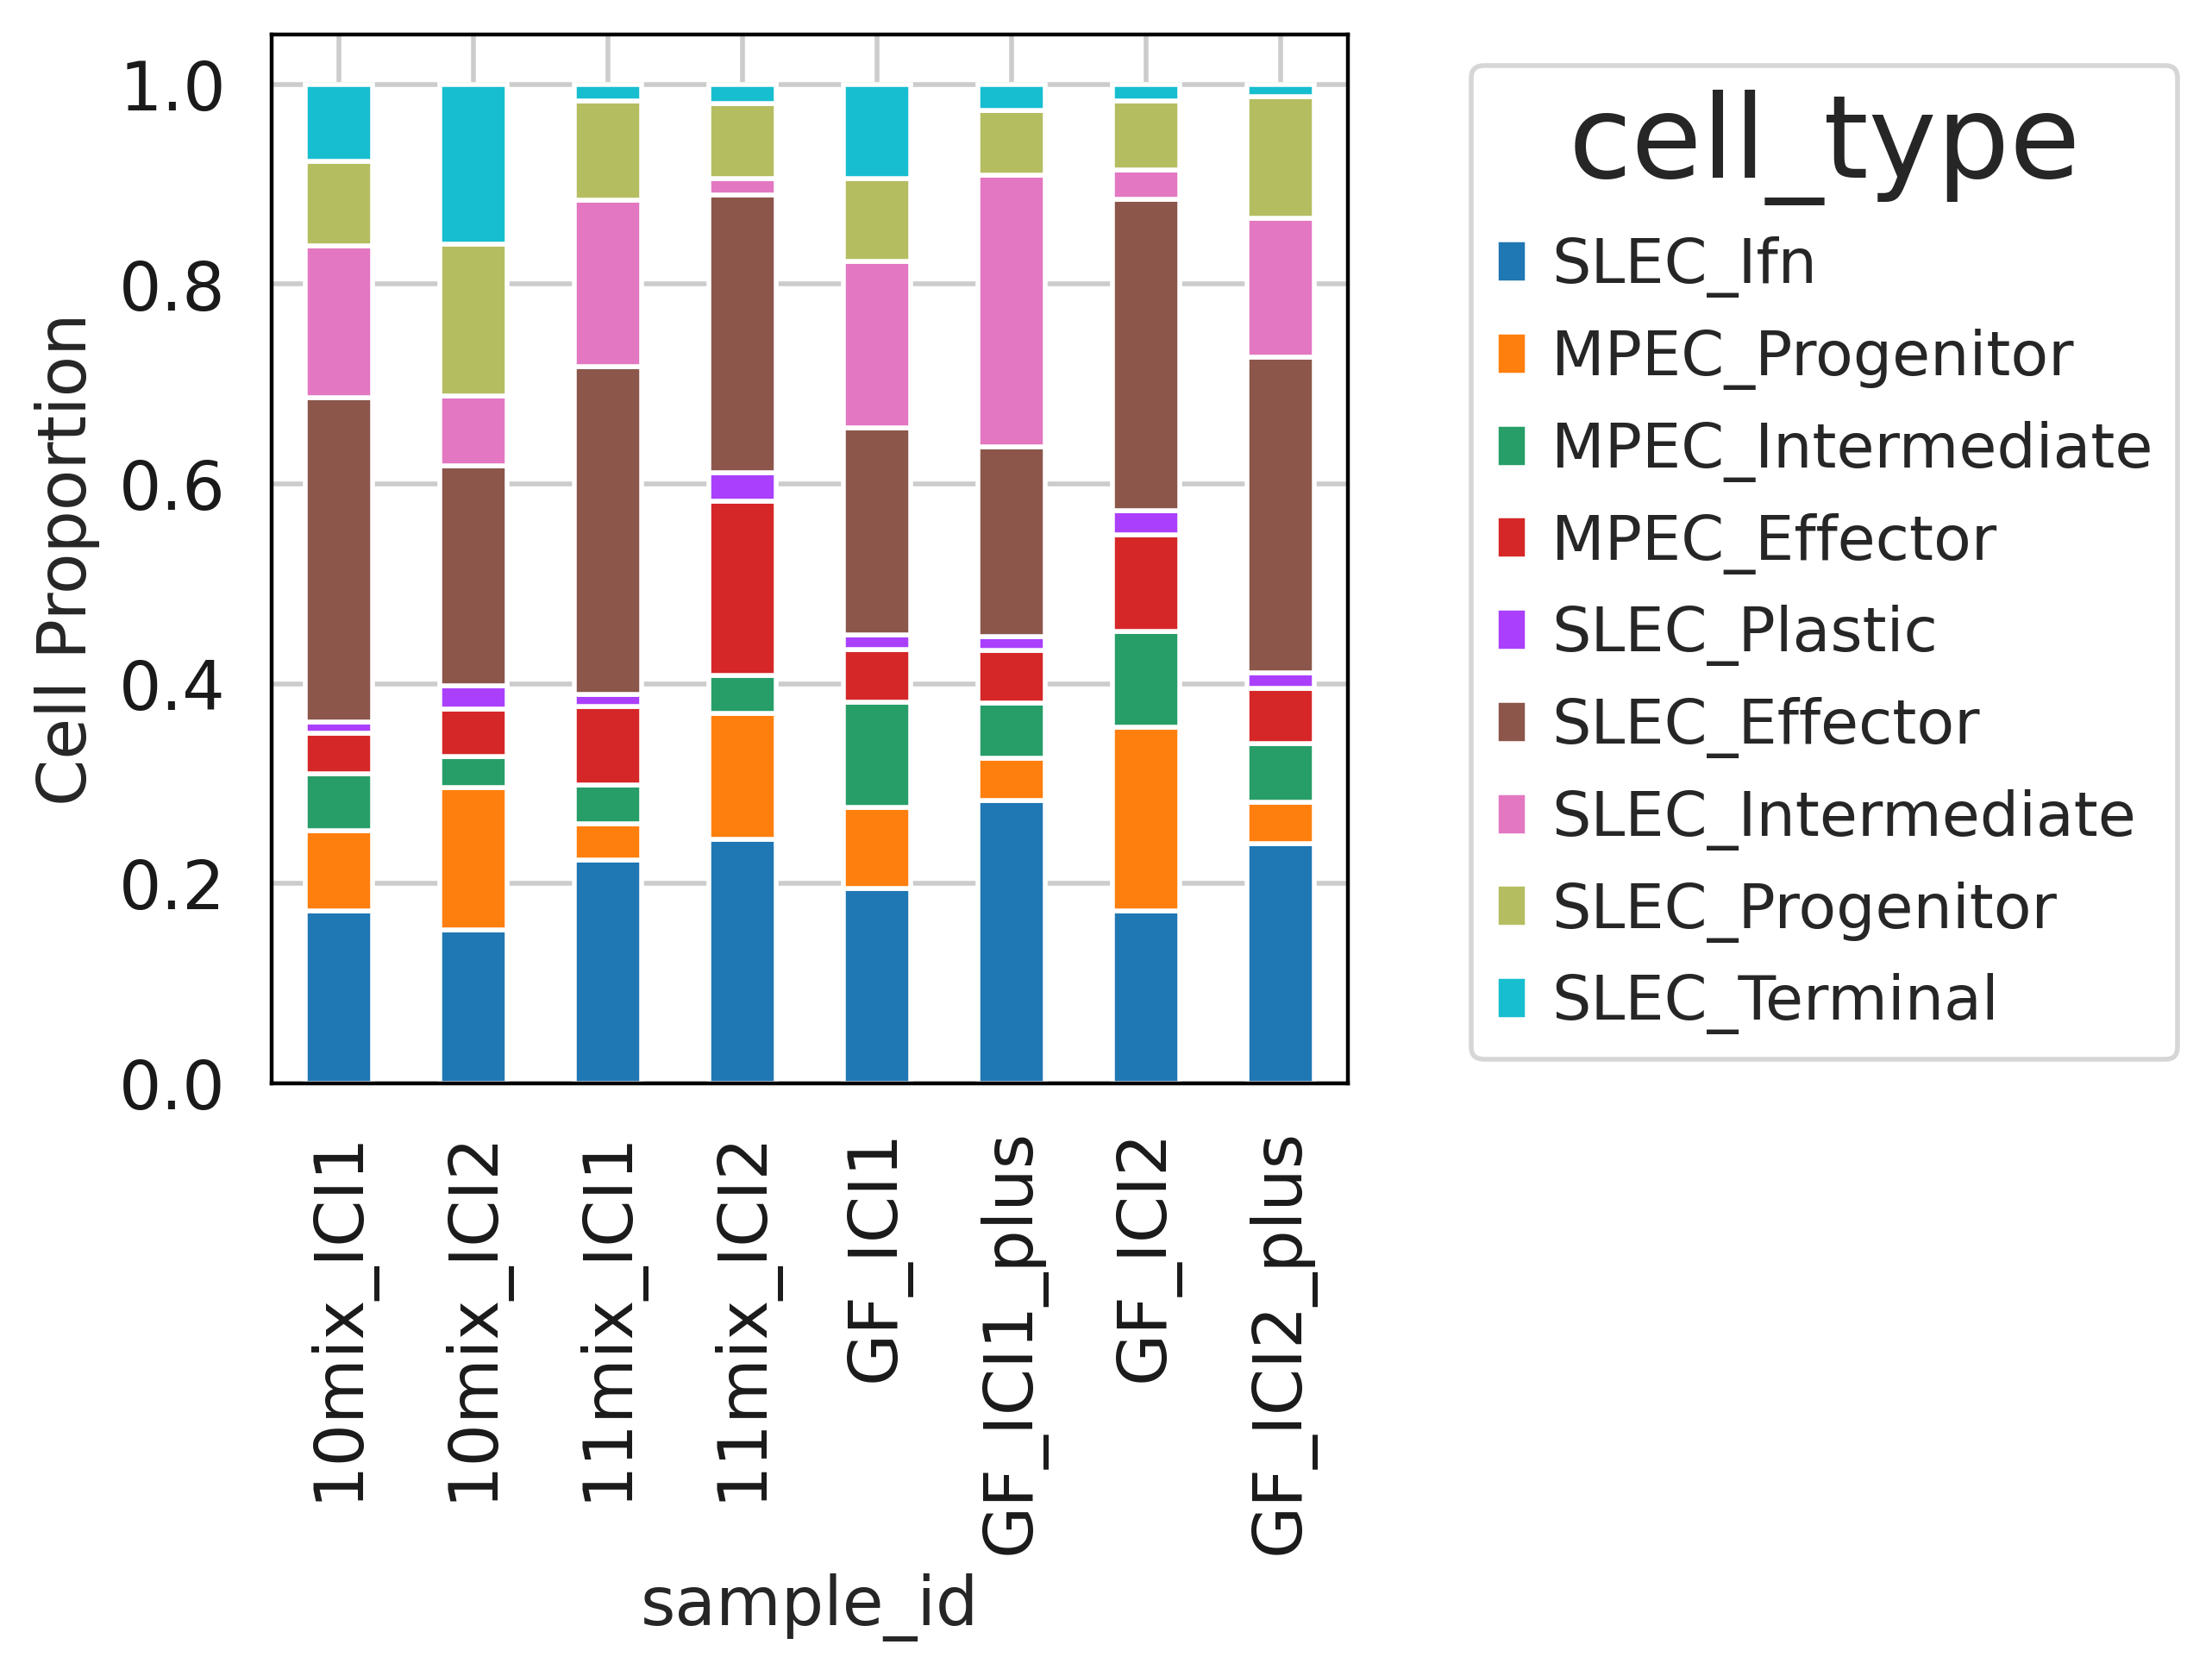

In [21]:
tmp = pd.crosstab(adata.obs['cell_type'], adata.obs['sample_id'], normalize='columns').T

# Plotting the stacked barplot
ax = tmp.plot(kind='bar', stacked=True, legend=False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    #ax.text(x + width / 1.5, y + height / 1.5, f'{height:.01%}', ha='center', va='center', size=6)
    #ax.text(x + width / 2, y + height / 2, f'{height:.2%}', ha='center', va='center')

# Adjusting legend
ax.legend(title='cell_type', bbox_to_anchor=(1.8,1), loc='upper right')
# Adding y-axis label
ax.set_ylabel('Cell Proportion')


#plt.tight_layout()

# Save the plot
#plt.savefig('stacked_barplot_with_percentages.png', bbox_inches='tight')
# Show the plot
plt.show()

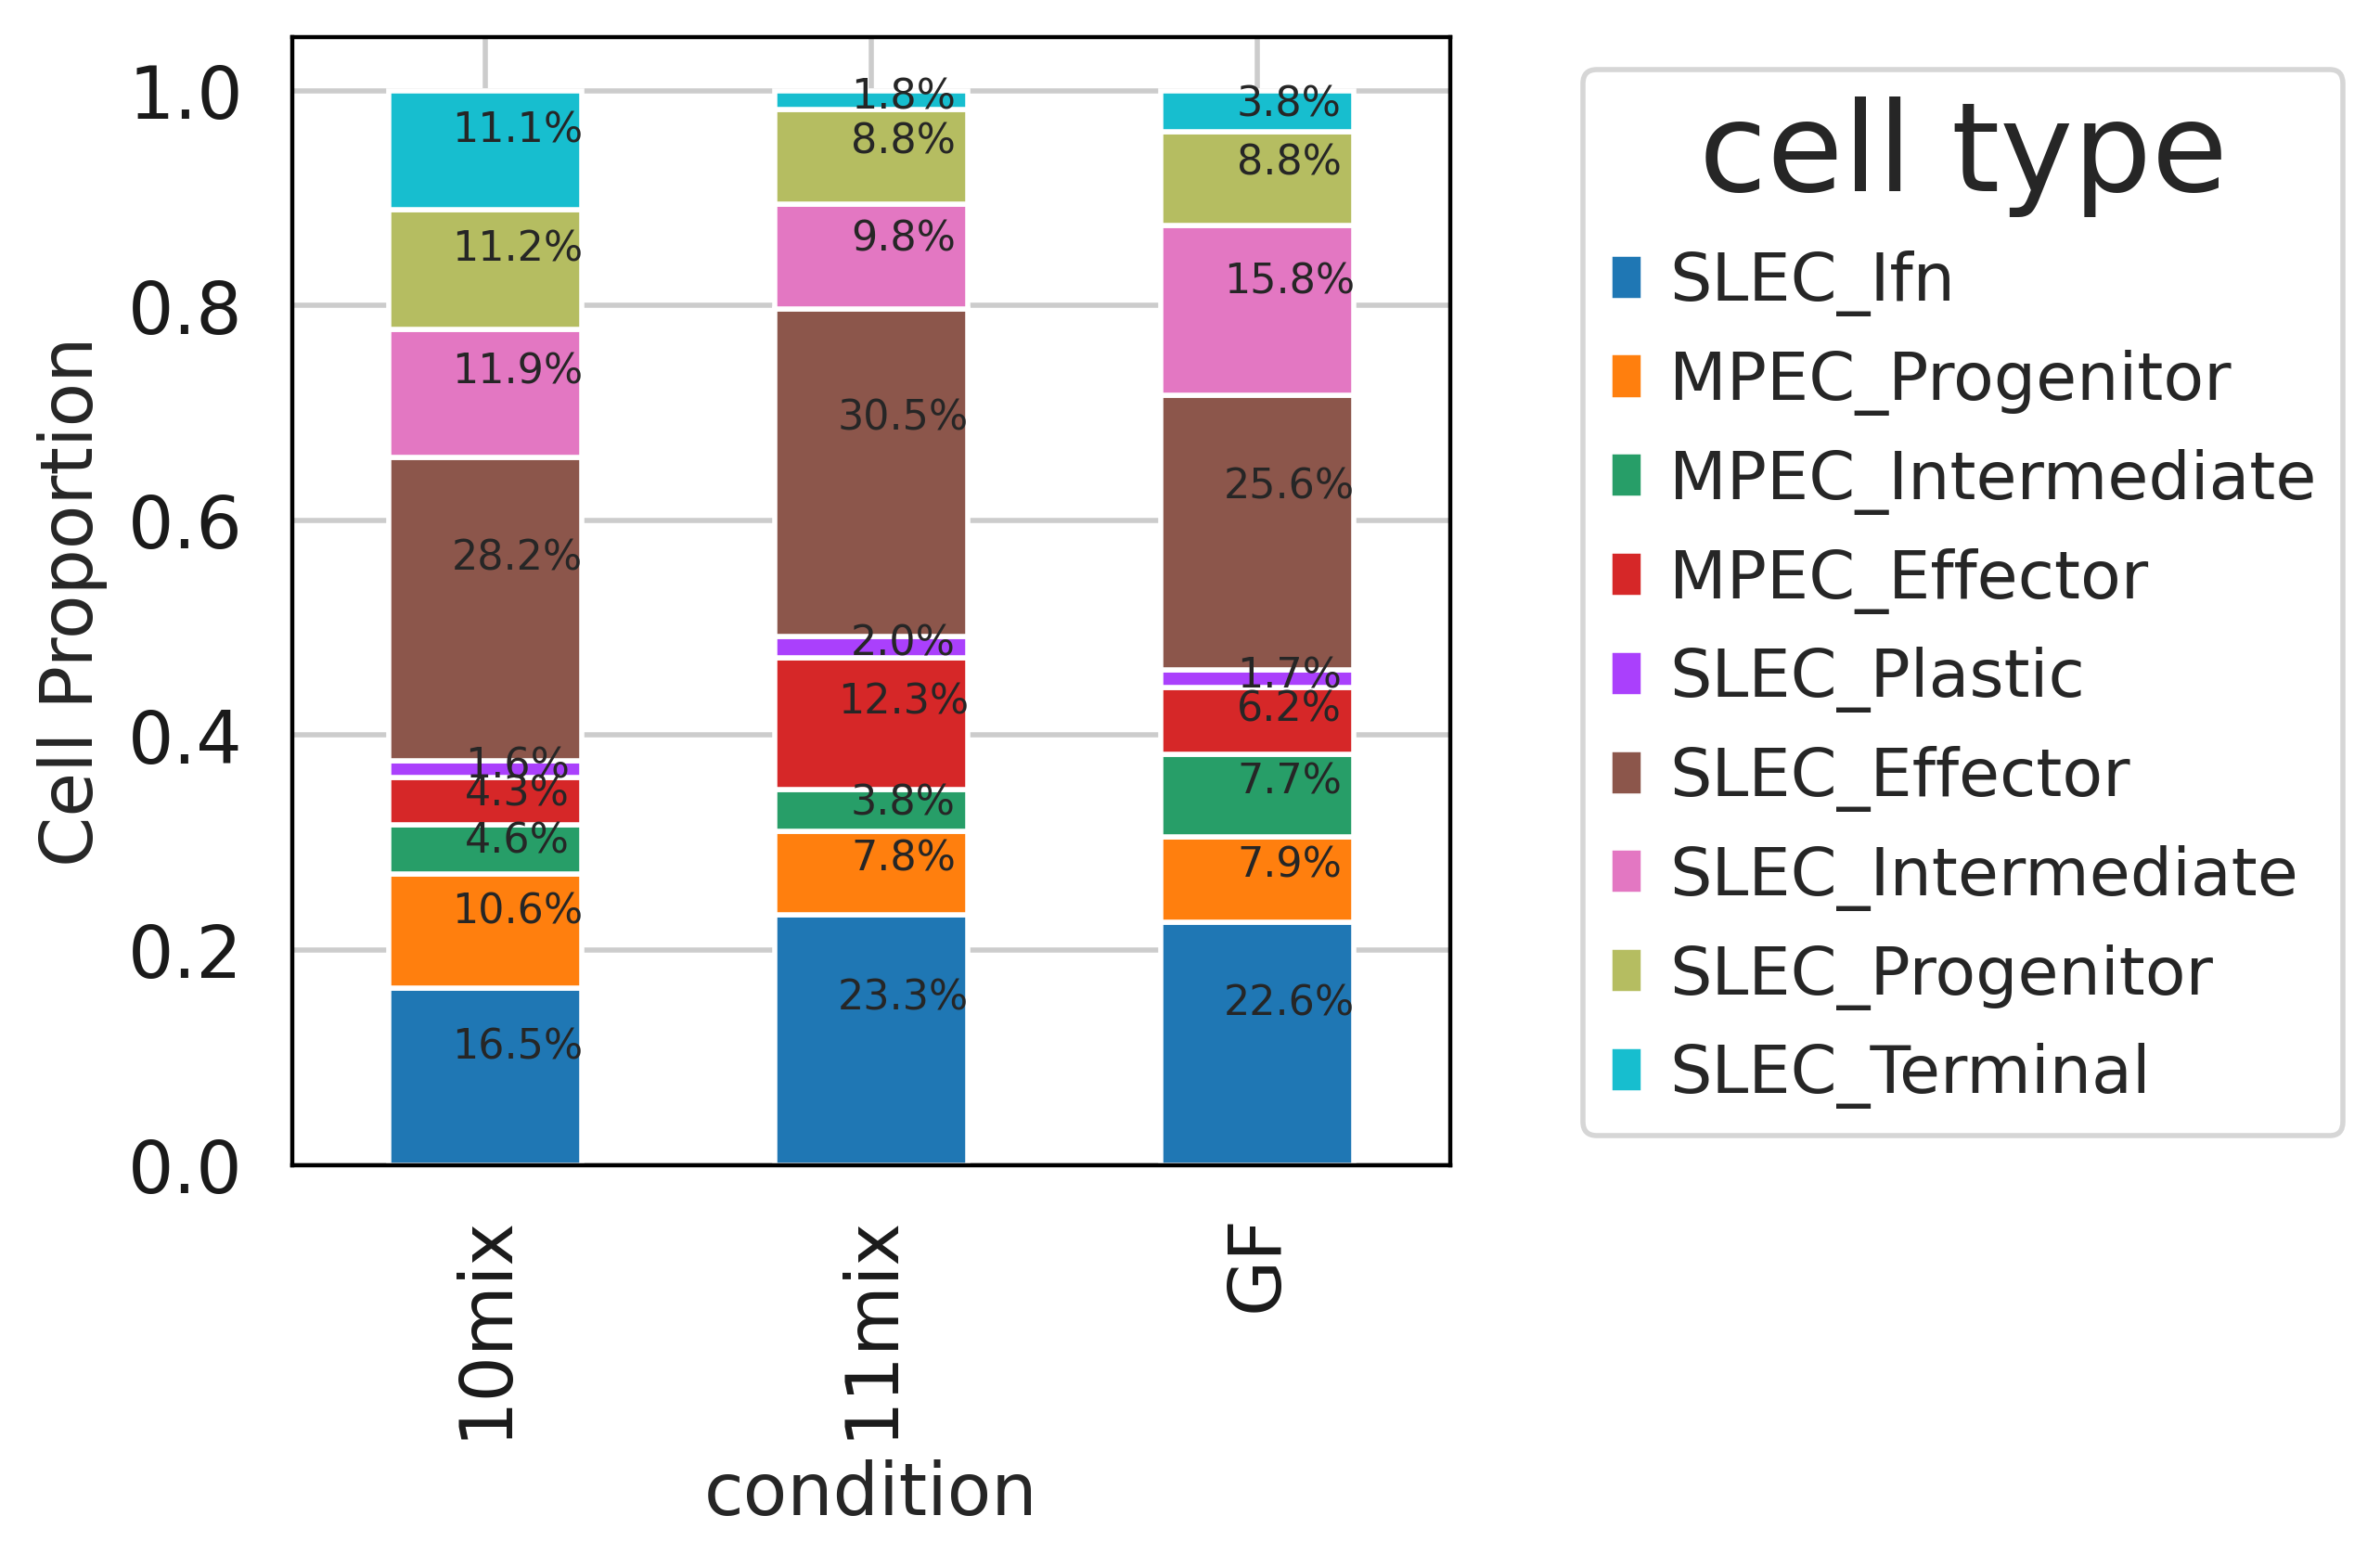

In [22]:
tmp = pd.crosstab(adata.obs['cell_type'], adata.obs['condition'], normalize='columns').T

# Plotting the stacked barplot
ax = tmp.plot(kind='bar', stacked=True, legend=False)

# Annotating percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 1.5, y + height / 1.5, f'{height:.01%}', ha='center', va='center', size=8)

# Adjusting legend
ax.legend(title='cell type', bbox_to_anchor=(1.8,1), loc='upper right')
# Adding y-axis label
ax.set_ylabel('Cell Proportion')


#plt.tight_layout()

# Save the plot
#plt.savefig('stacked_barplot_with_percentages.png', bbox_inches='tight')
# Show the plot
plt.show()

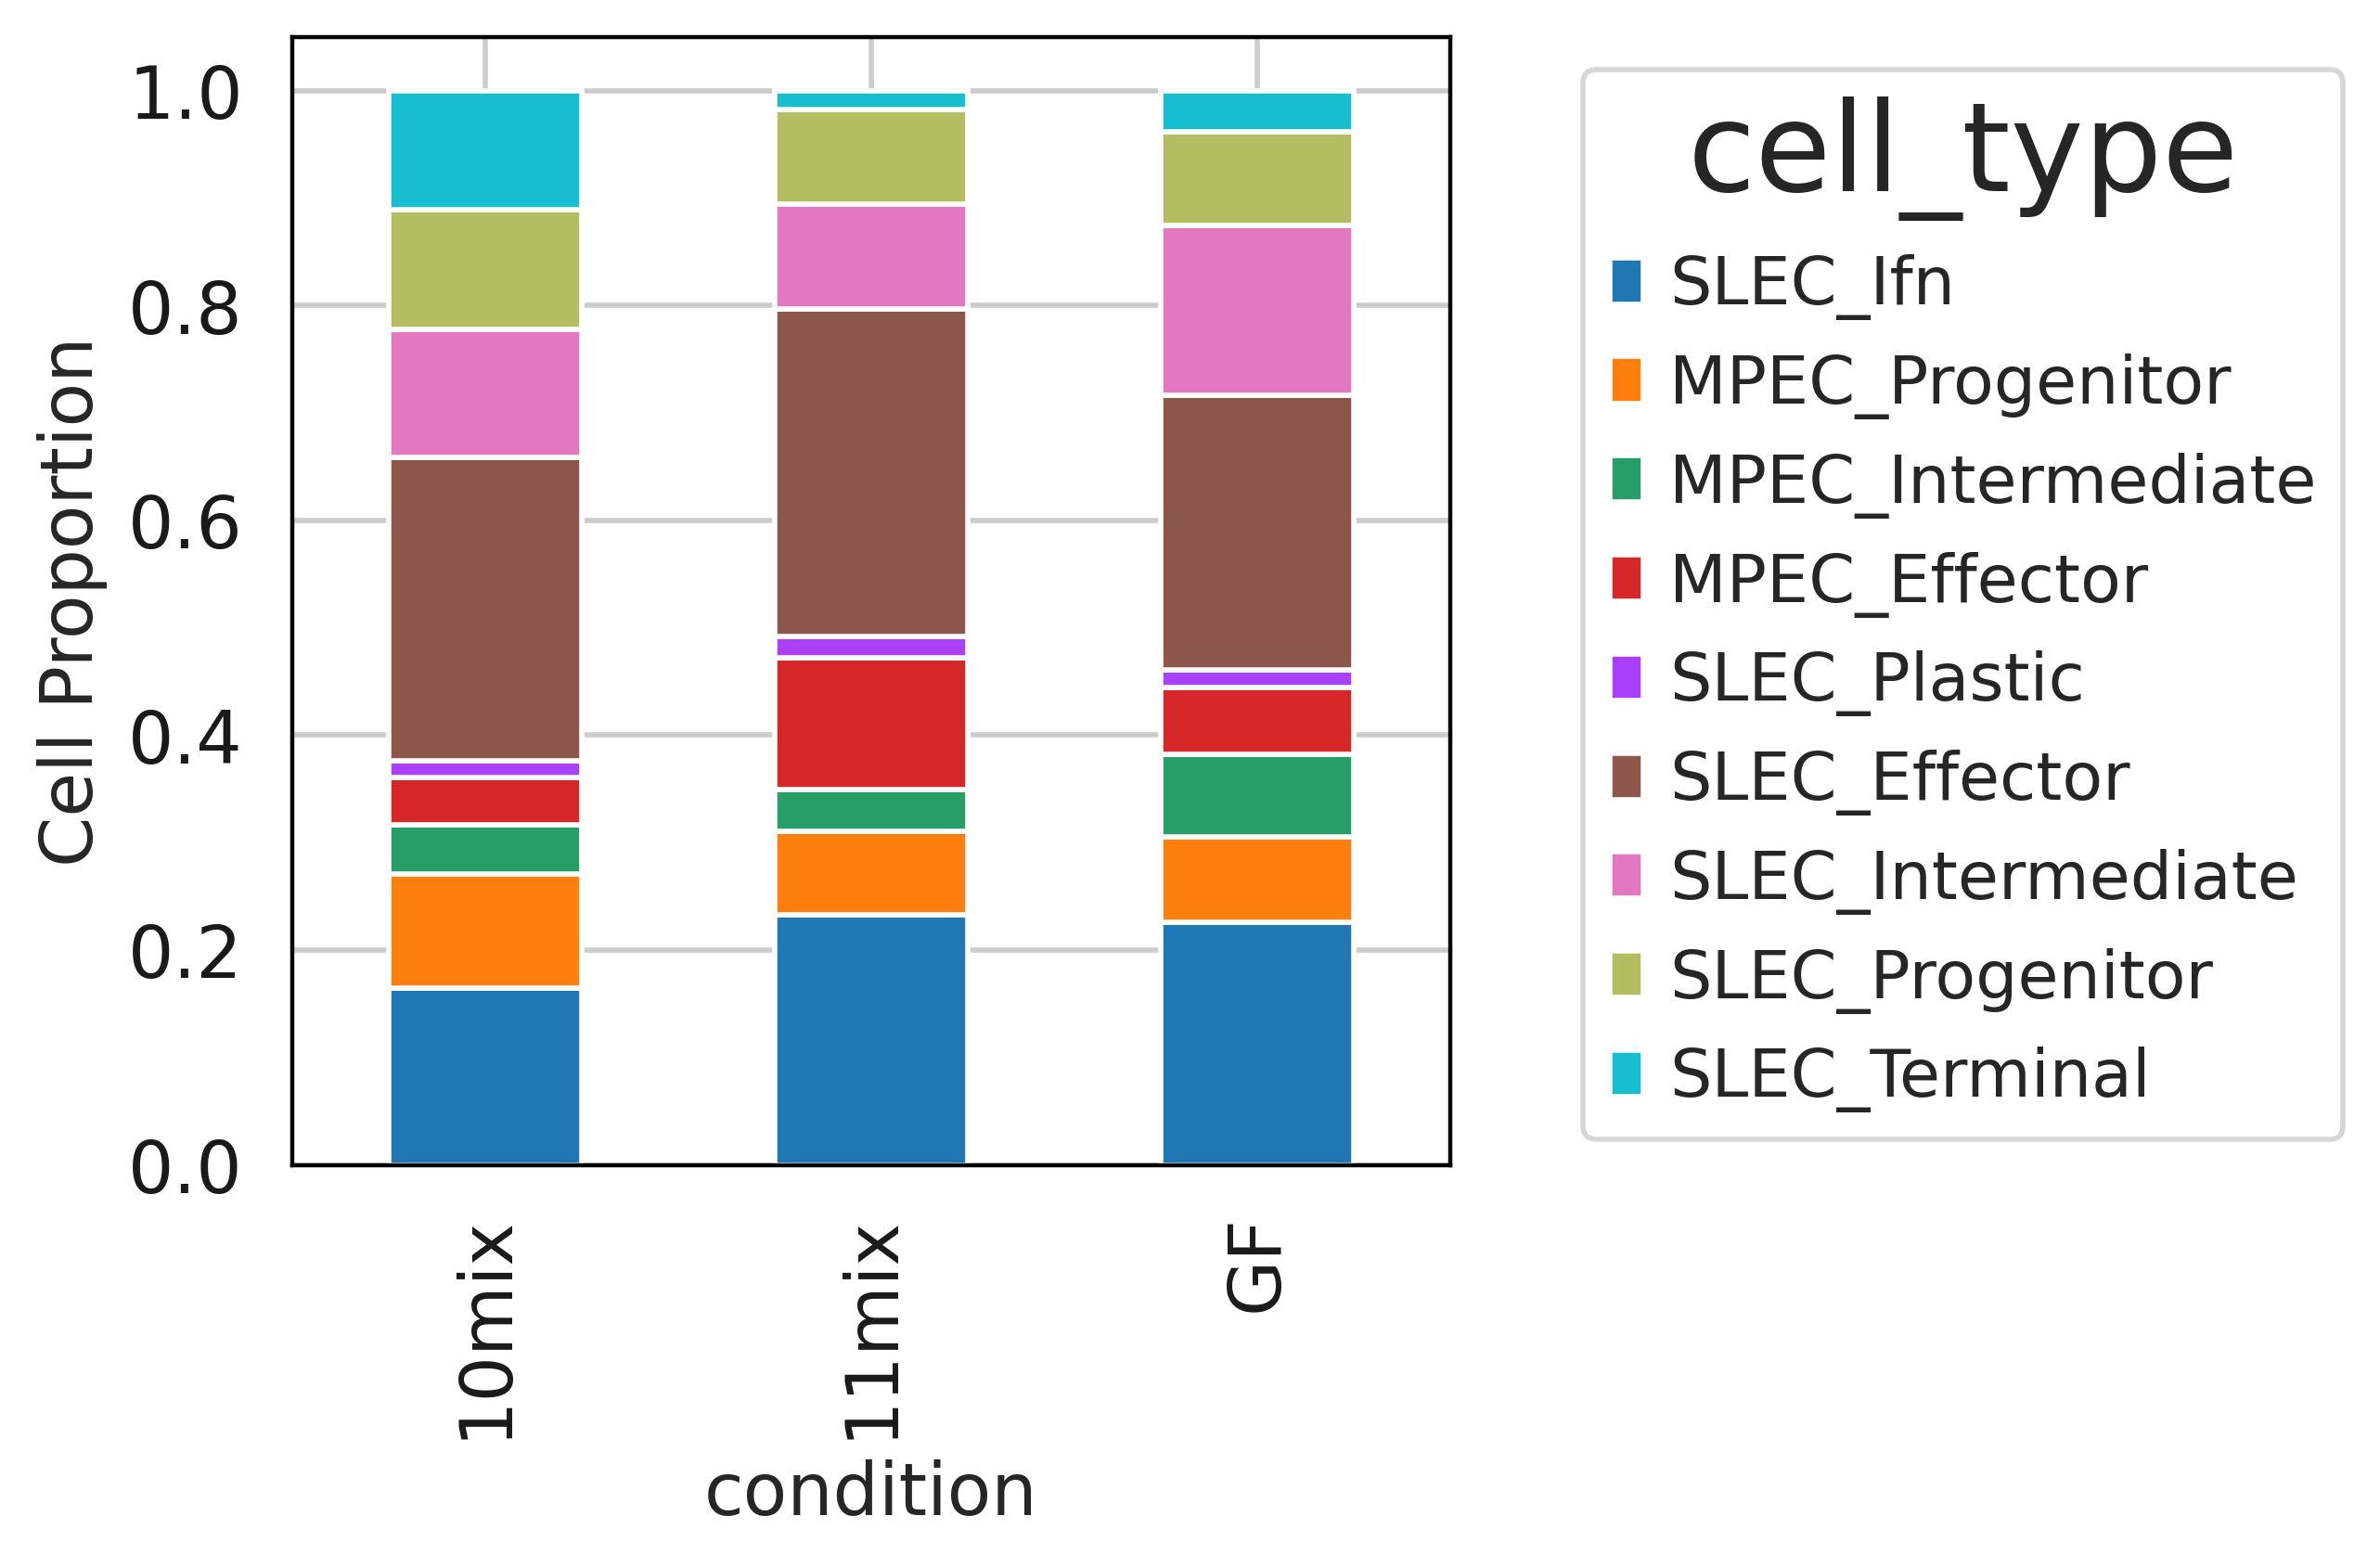

In [23]:
tmp = pd.crosstab(adata.obs['cell_type'], adata.obs['condition'], normalize='columns').T
ax = tmp.plot(kind='bar', stacked=True, legend=False)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

ax.legend(title='cell_type', bbox_to_anchor=(1.8,1), loc='upper right')
# Adding y-axis label
ax.set_ylabel('Cell Proportion')

plt.show()

Text(0, 0.5, '')

<Figure size 2000x1200 with 0 Axes>

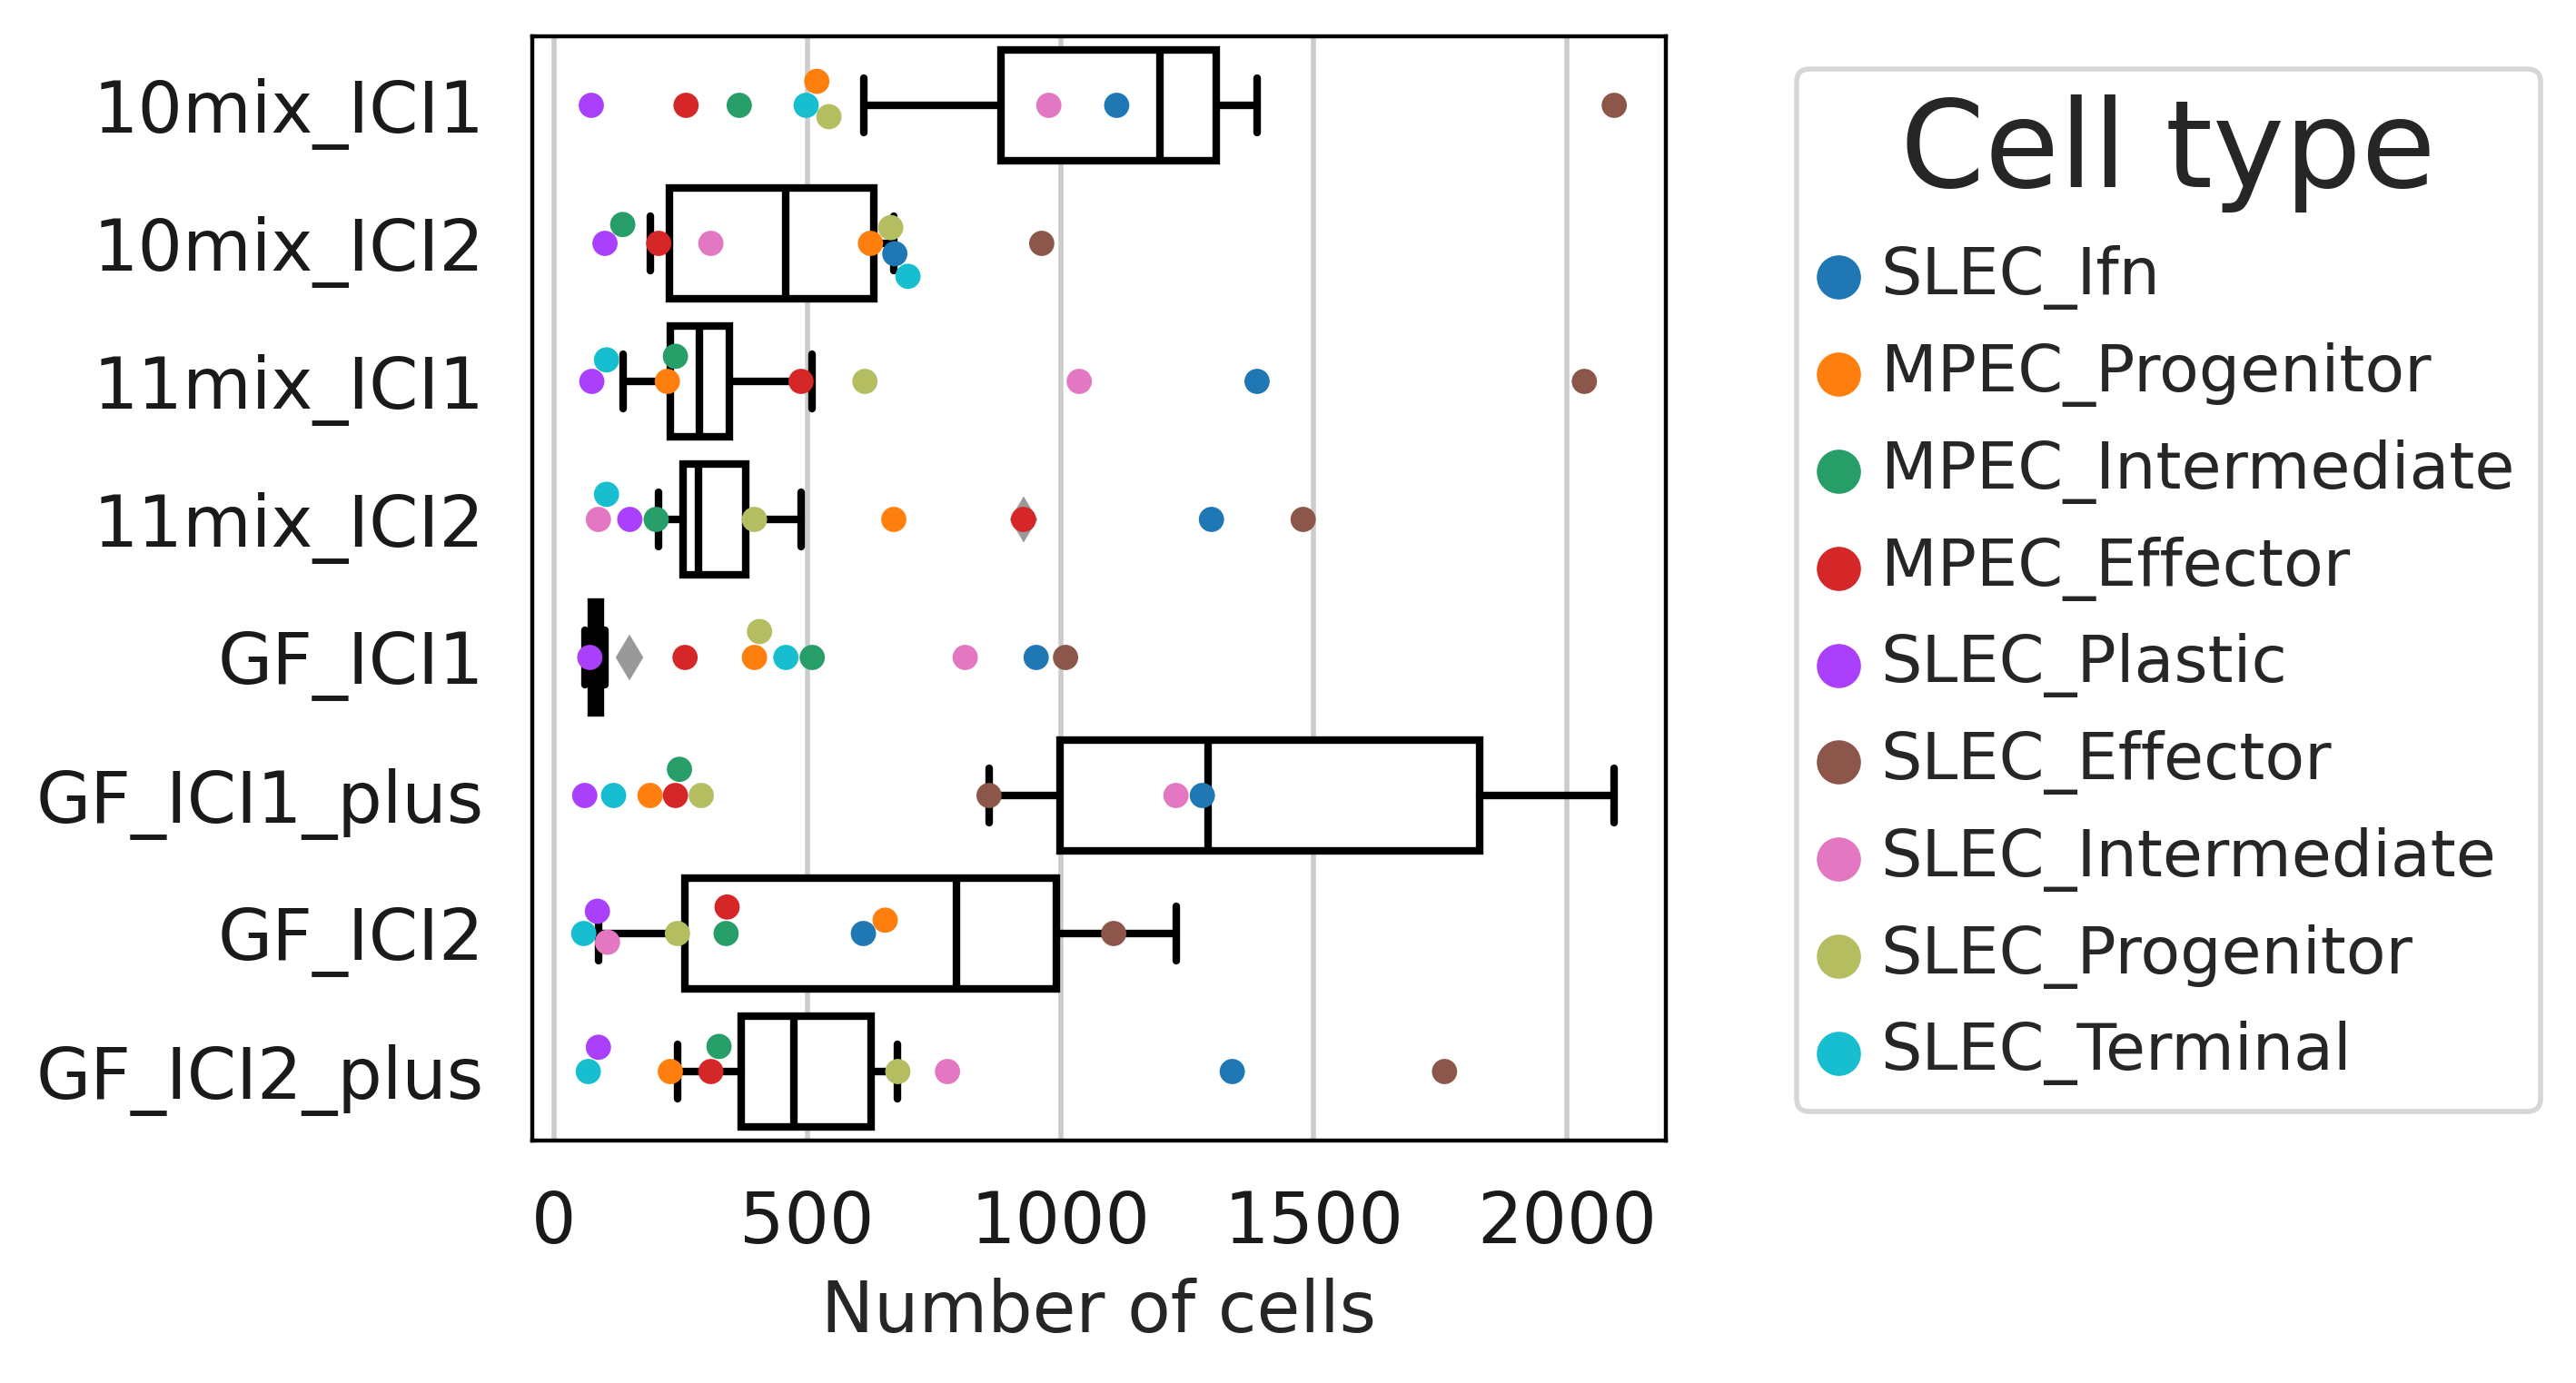

In [24]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_count', y='cell_type', data=df_num, color='white',
            boxprops=dict(edgecolor='black'), # Set box edge color
            whiskerprops=dict(color='black'), # Set whisker color
            capprops=dict(color='black'), # Set cap color
            medianprops=dict(color='black') # Set median line color
           )
ax = sns.swarmplot(x="cell_count", y="sample_id",hue="cell_type",data=df_num)
ax.legend(title='Cell type', bbox_to_anchor=(1.8,1), loc='upper right')
plt.xlabel("Number of cells")
plt.ylabel("")

Text(0, 0.5, '')

<Figure size 2000x1200 with 0 Axes>

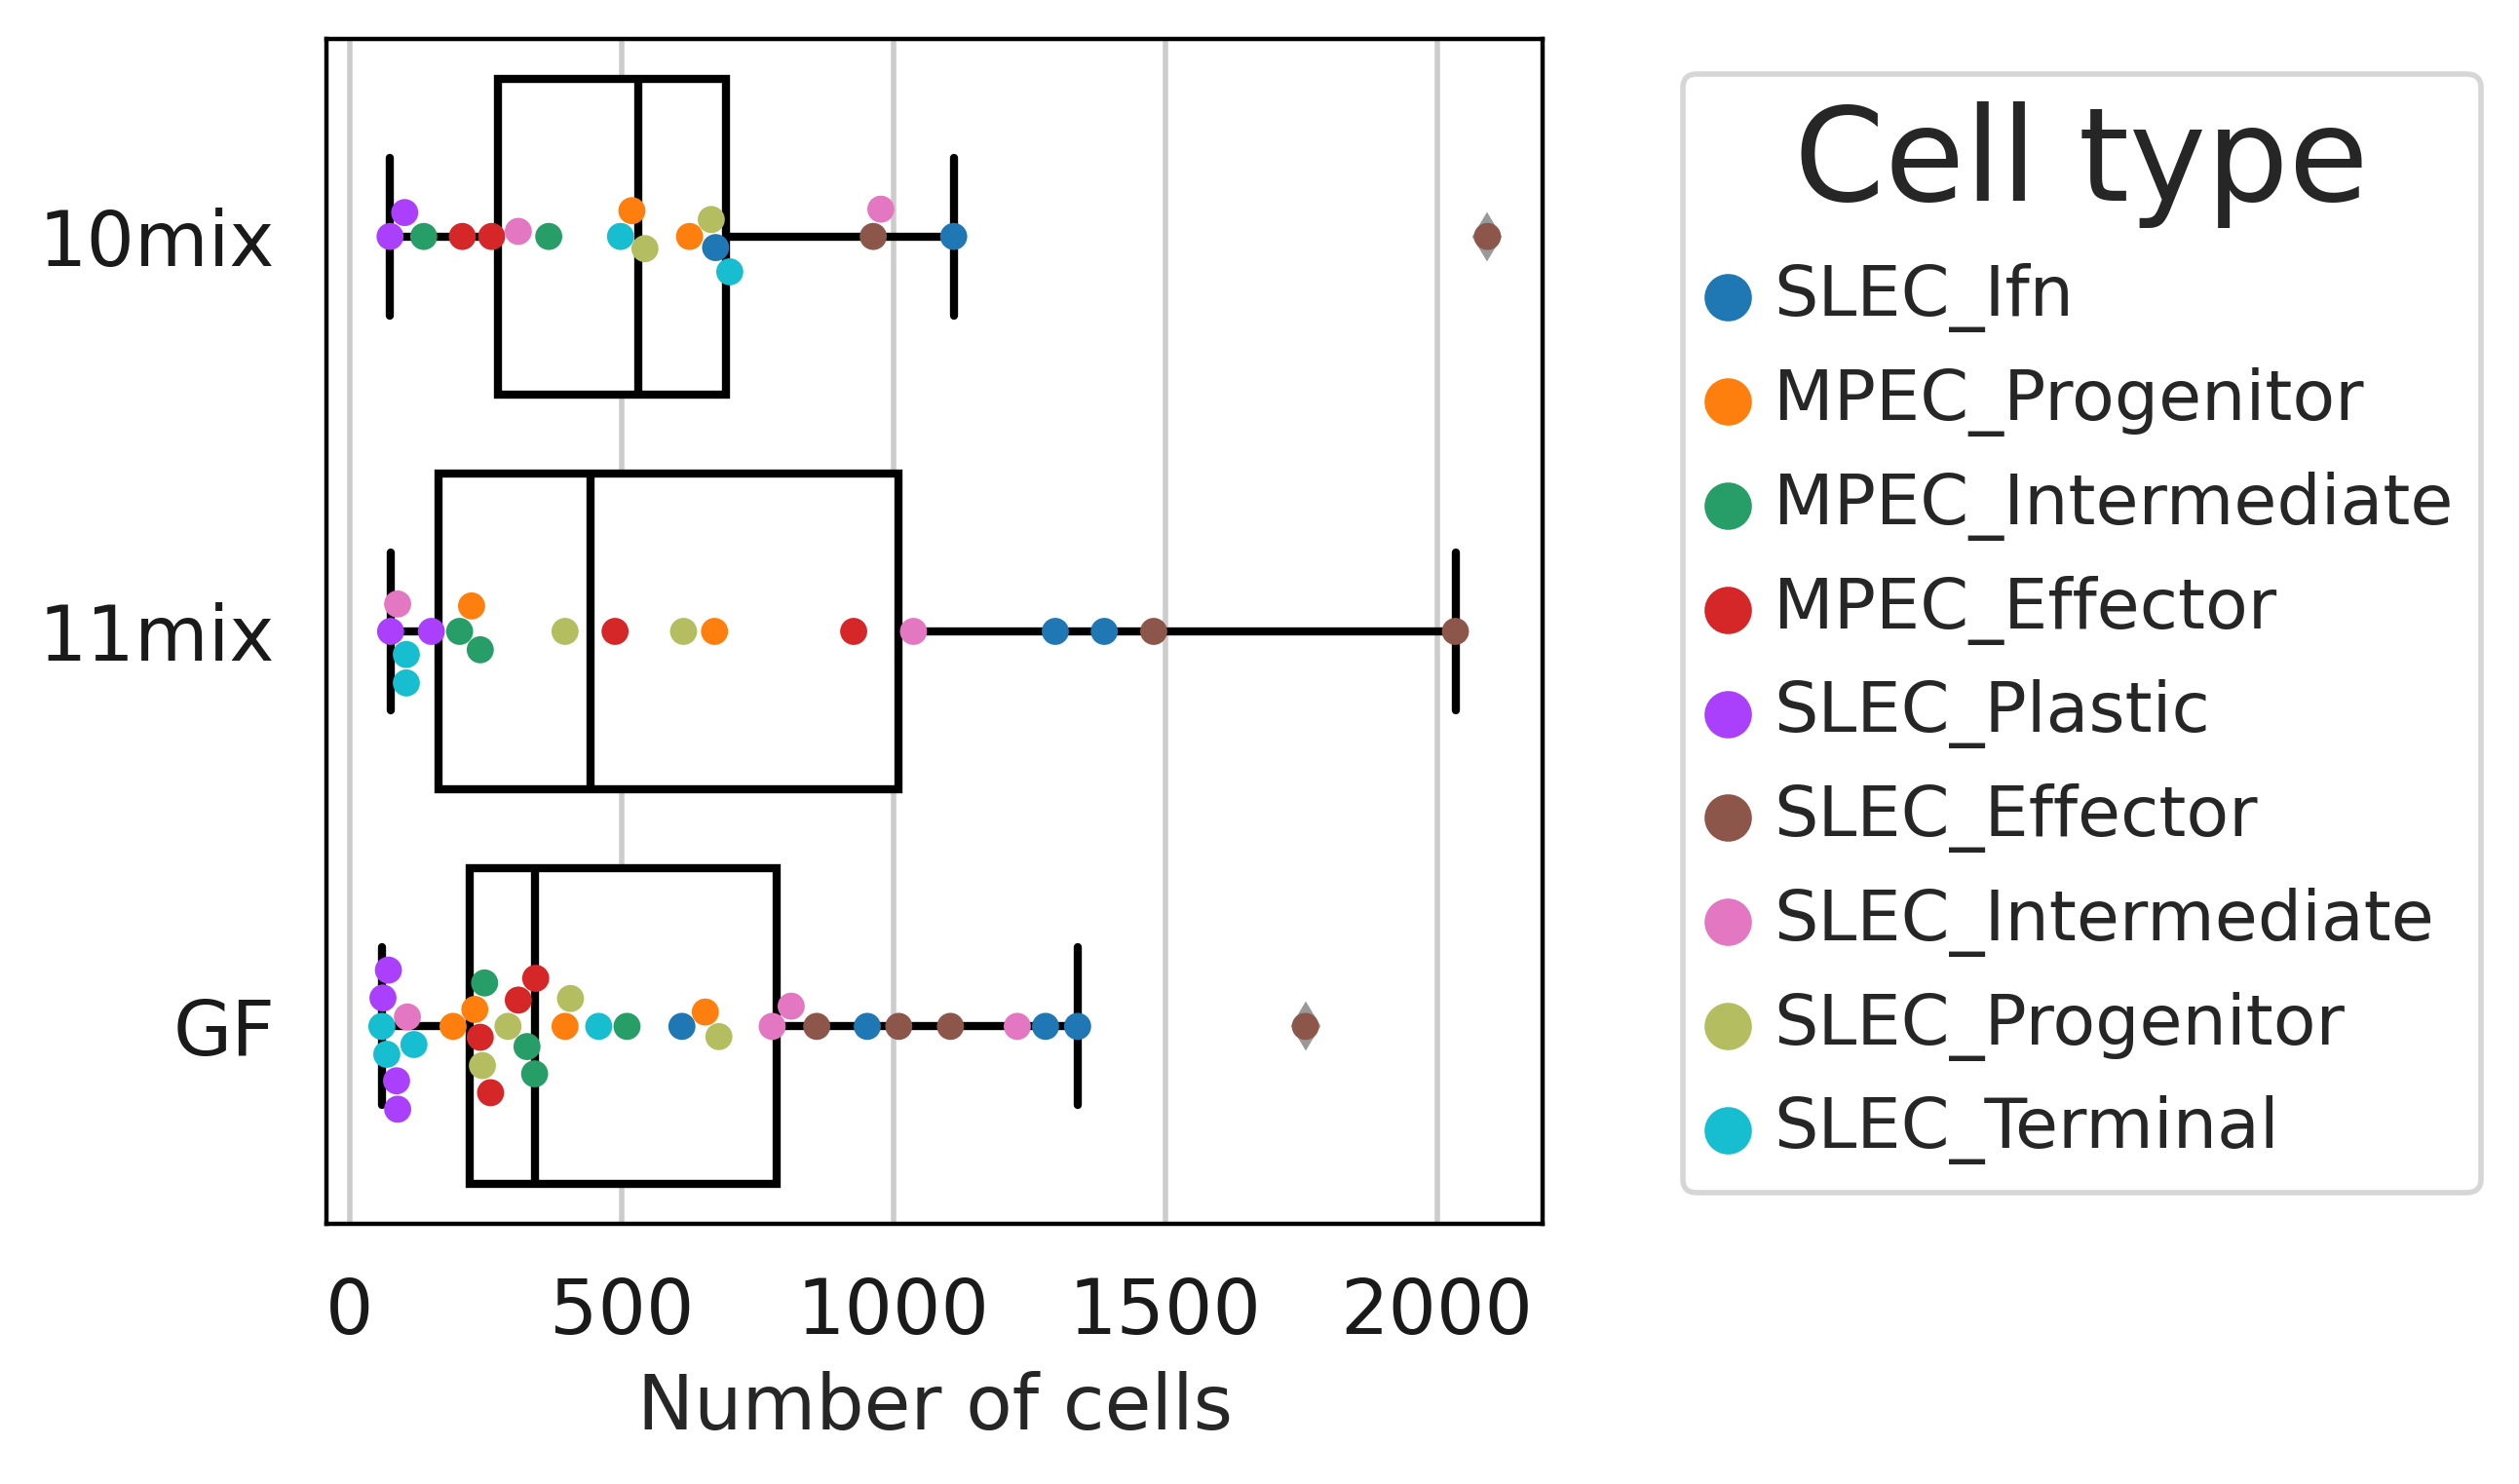

In [25]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_count', y='condition', data=df_num, color='white',
            boxprops=dict(edgecolor='black'), # Set box edge color
            whiskerprops=dict(color='black'), # Set whisker color
            capprops=dict(color='black'), # Set cap color
            medianprops=dict(color='black') # Set median line color
           )
ax = sns.swarmplot(x="cell_count", y="condition",hue="cell_type",data=df_num)
ax.legend(title='Cell type', bbox_to_anchor=(1.8,1), loc='upper right')
plt.xlabel("Number of cells")
plt.ylabel("")

Text(0, 0.5, '')

<Figure size 2000x1200 with 0 Axes>

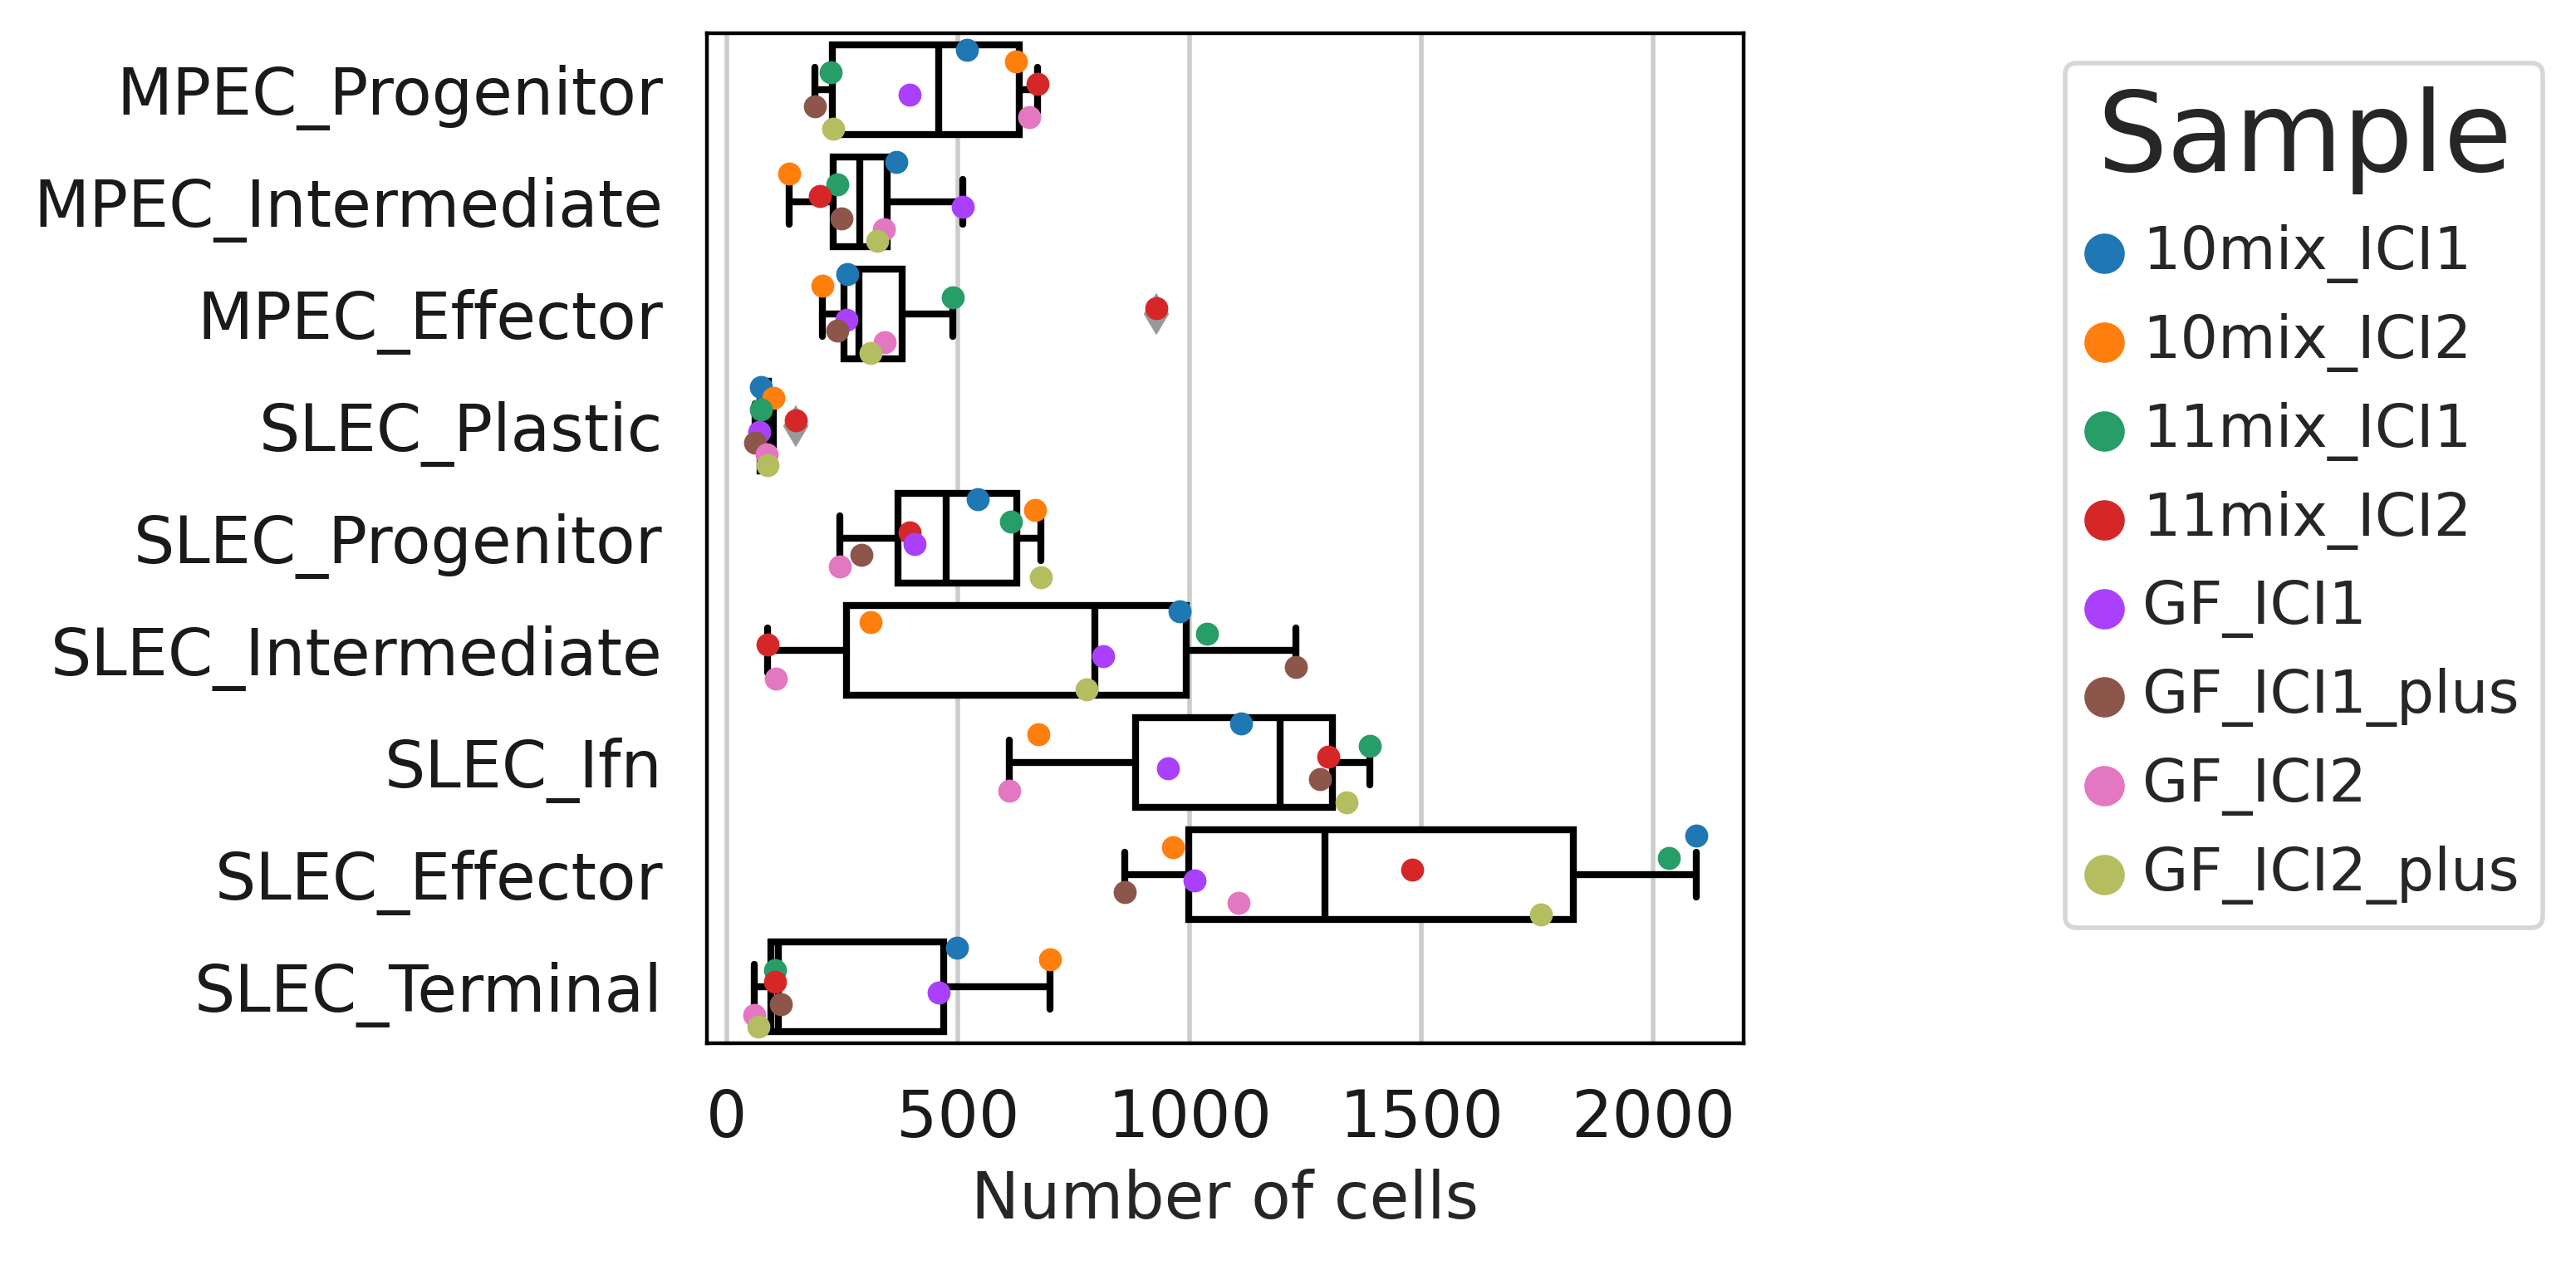

In [26]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_count', y='cell_type', data=df_num, color='white',order=order_list,
            boxprops=dict(edgecolor='black'), # Set box edge color
            whiskerprops=dict(color='black'), # Set whisker color
            capprops=dict(color='black'), # Set cap color
            medianprops=dict(color='black') # Set median line color
           )
ax = sns.swarmplot(x="cell_count", y="cell_type",hue="sample_id",data=df_num,dodge=True,order=order_list)
ax.legend(title='Sample', bbox_to_anchor=(1.8,1), loc='upper right')
plt.xlabel("Number of cells")
plt.ylabel("")

/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '')

<Figure size 2000x1200 with 0 Axes>

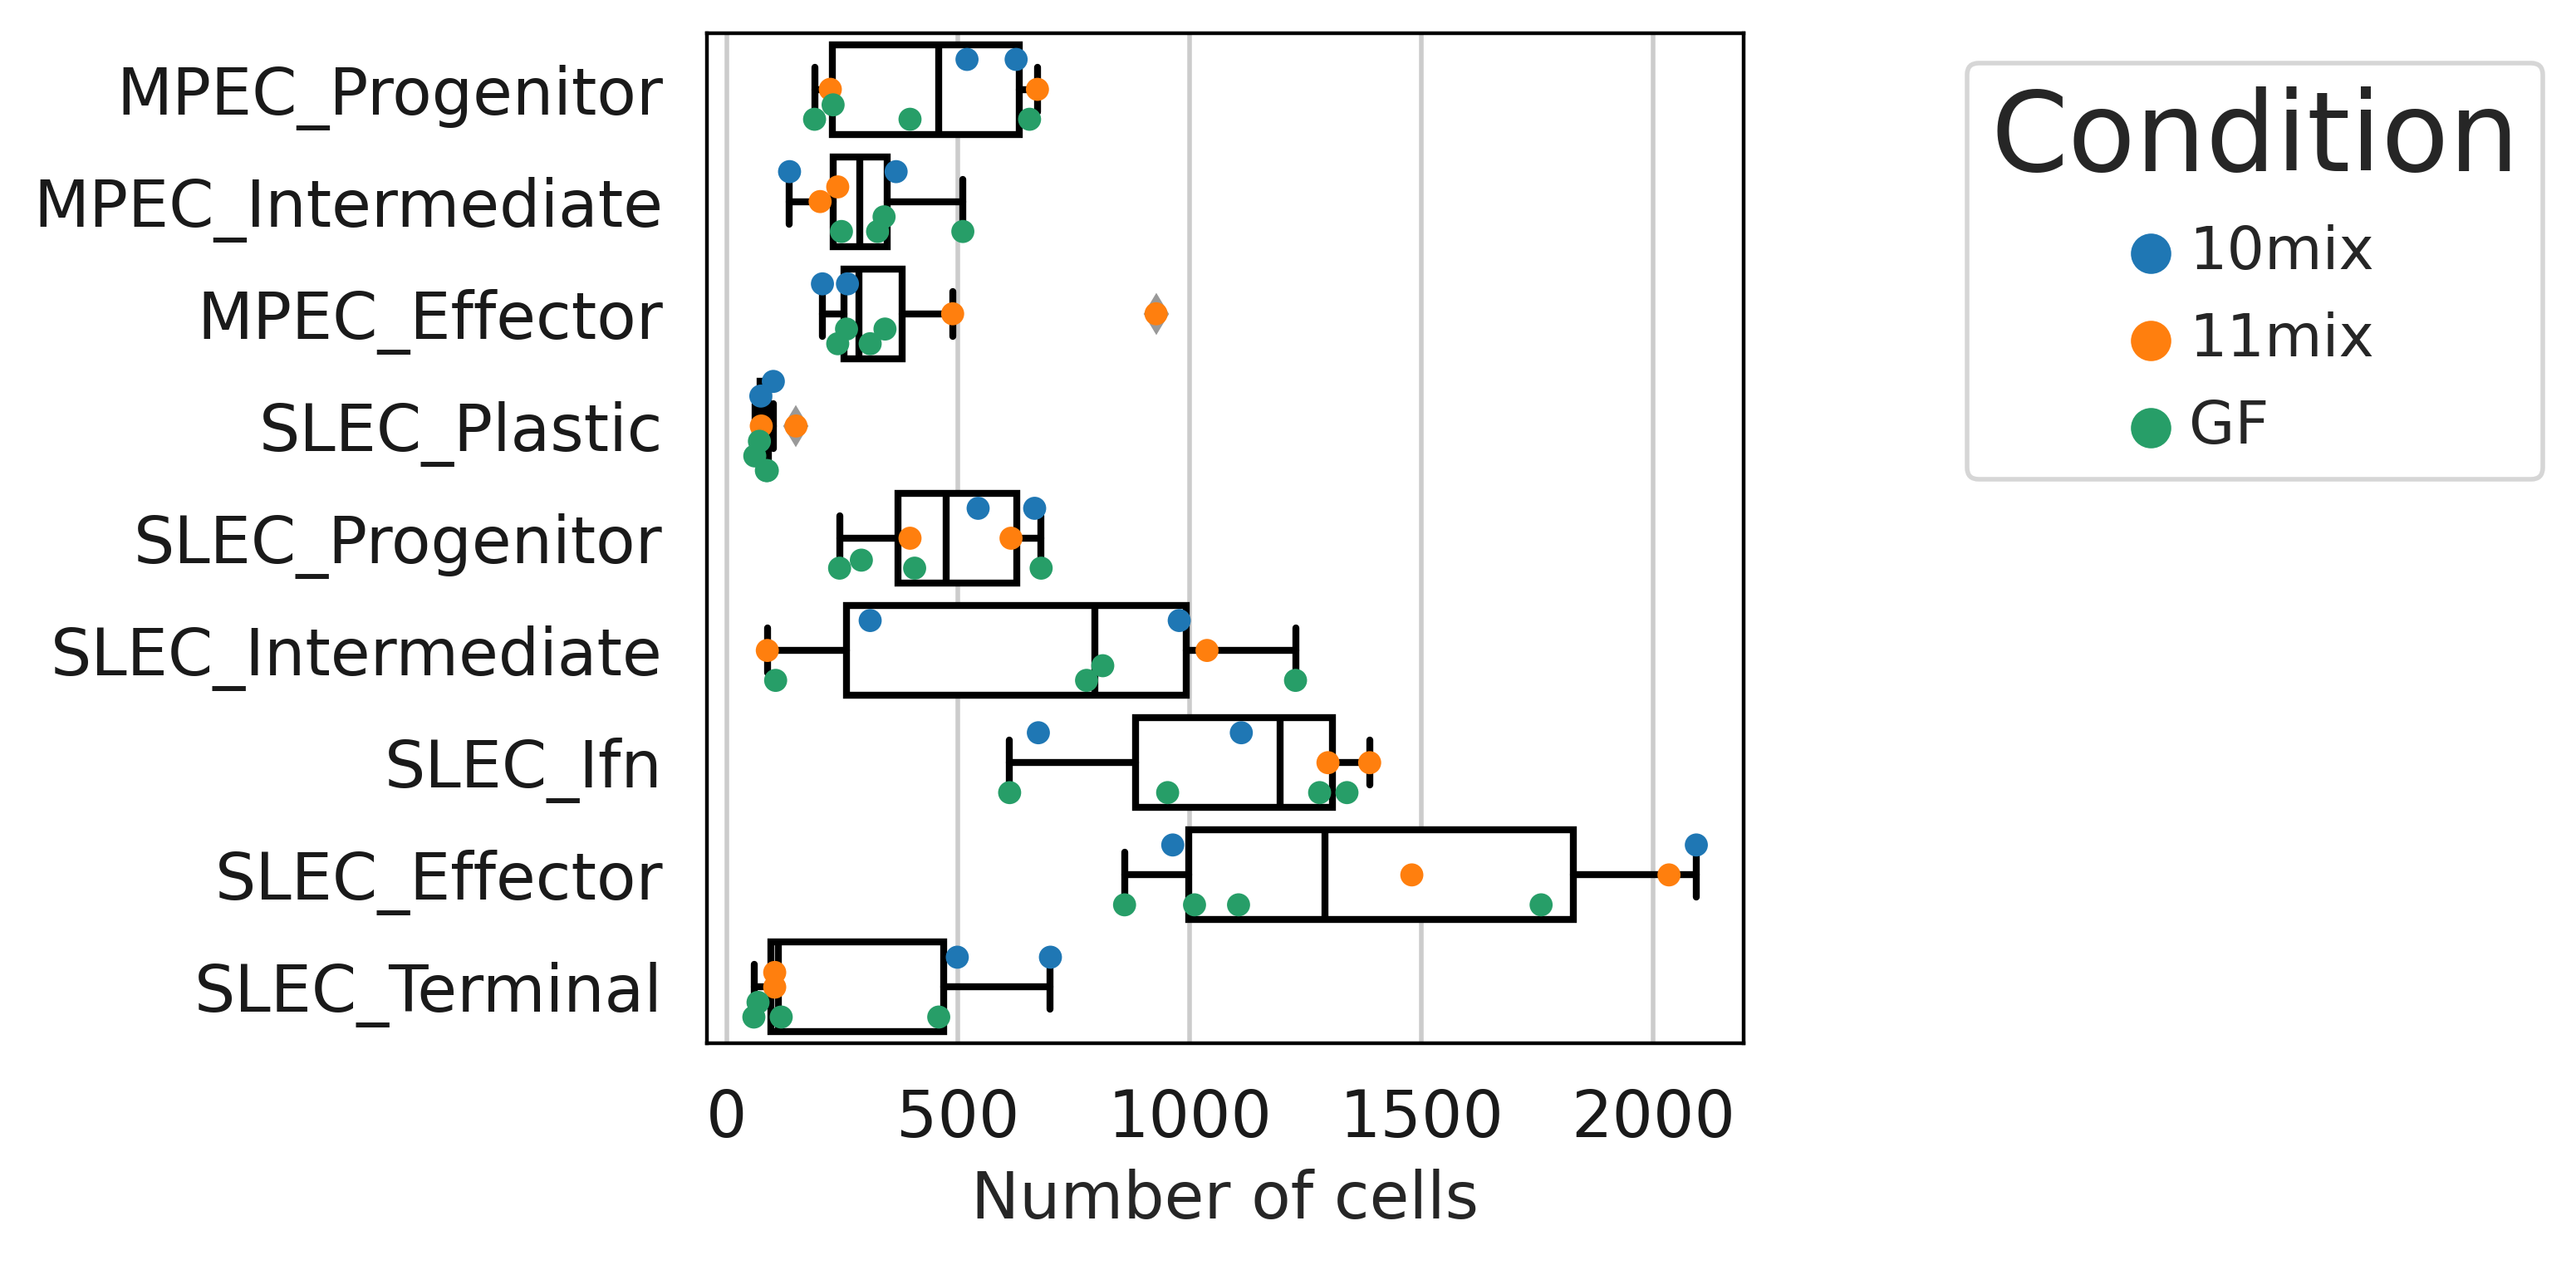

In [27]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_count', y='cell_type', data=df_num, color='white',order=order_list,
            boxprops=dict(edgecolor='black'), # Set box edge color
            whiskerprops=dict(color='black'), # Set whisker color
            capprops=dict(color='black'), # Set cap color
            medianprops=dict(color='black') # Set median line color
           )
ax = sns.swarmplot(x="cell_count", y="cell_type",hue="condition",data=df_num,dodge=True,order=order_list)
ax.legend(title='Condition', bbox_to_anchor=(1.8,1), loc='upper right')
plt.xlabel("Number of cells")
plt.ylabel("")

In [28]:
df_num

sample_id condition      cell_type cell_type2  cell_count  \
0     10mix_ICI1     10mix  SLEC_Effector      SLEC5        2093   
1     11mix_ICI1     11mix  SLEC_Effector      SLEC5        2034   
2   GF_ICI2_plus        GF  SLEC_Effector      SLEC5        1758   
3     11mix_ICI2     11mix  SLEC_Effector      SLEC5        1479   
4     11mix_ICI1     11mix       SLEC_Ifn      SLEC4        1388   
..           ...       ...            ...        ...         ...   
67    10mix_ICI1     10mix   SLEC_Plastic      SLEC1          74   
68       GF_ICI1        GF   SLEC_Plastic      SLEC1          71   
69  GF_ICI2_plus        GF  SLEC_Terminal      SLEC6          68   
70  GF_ICI1_plus        GF   SLEC_Plastic      SLEC1          61   
71       GF_ICI2        GF  SLEC_Terminal      SLEC6          59   

    total_cell_count  cell_fraction  
0              10821       0.193420  
1              11519       0.176578  
2              18511       0.094971  
3              11519       0.128397  
4              11519       0.120497  
..               ...            ...  
67             10821       0.006839  
68             18511       0.003836  
69             18511       0.003673  
70             18511       0.003295  
71             18511       0.003187  

[72 rows x 7 columns]

In [29]:
### Fraction of cells 

Text(0, 0.5, '')

<Figure size 2000x1200 with 0 Axes>

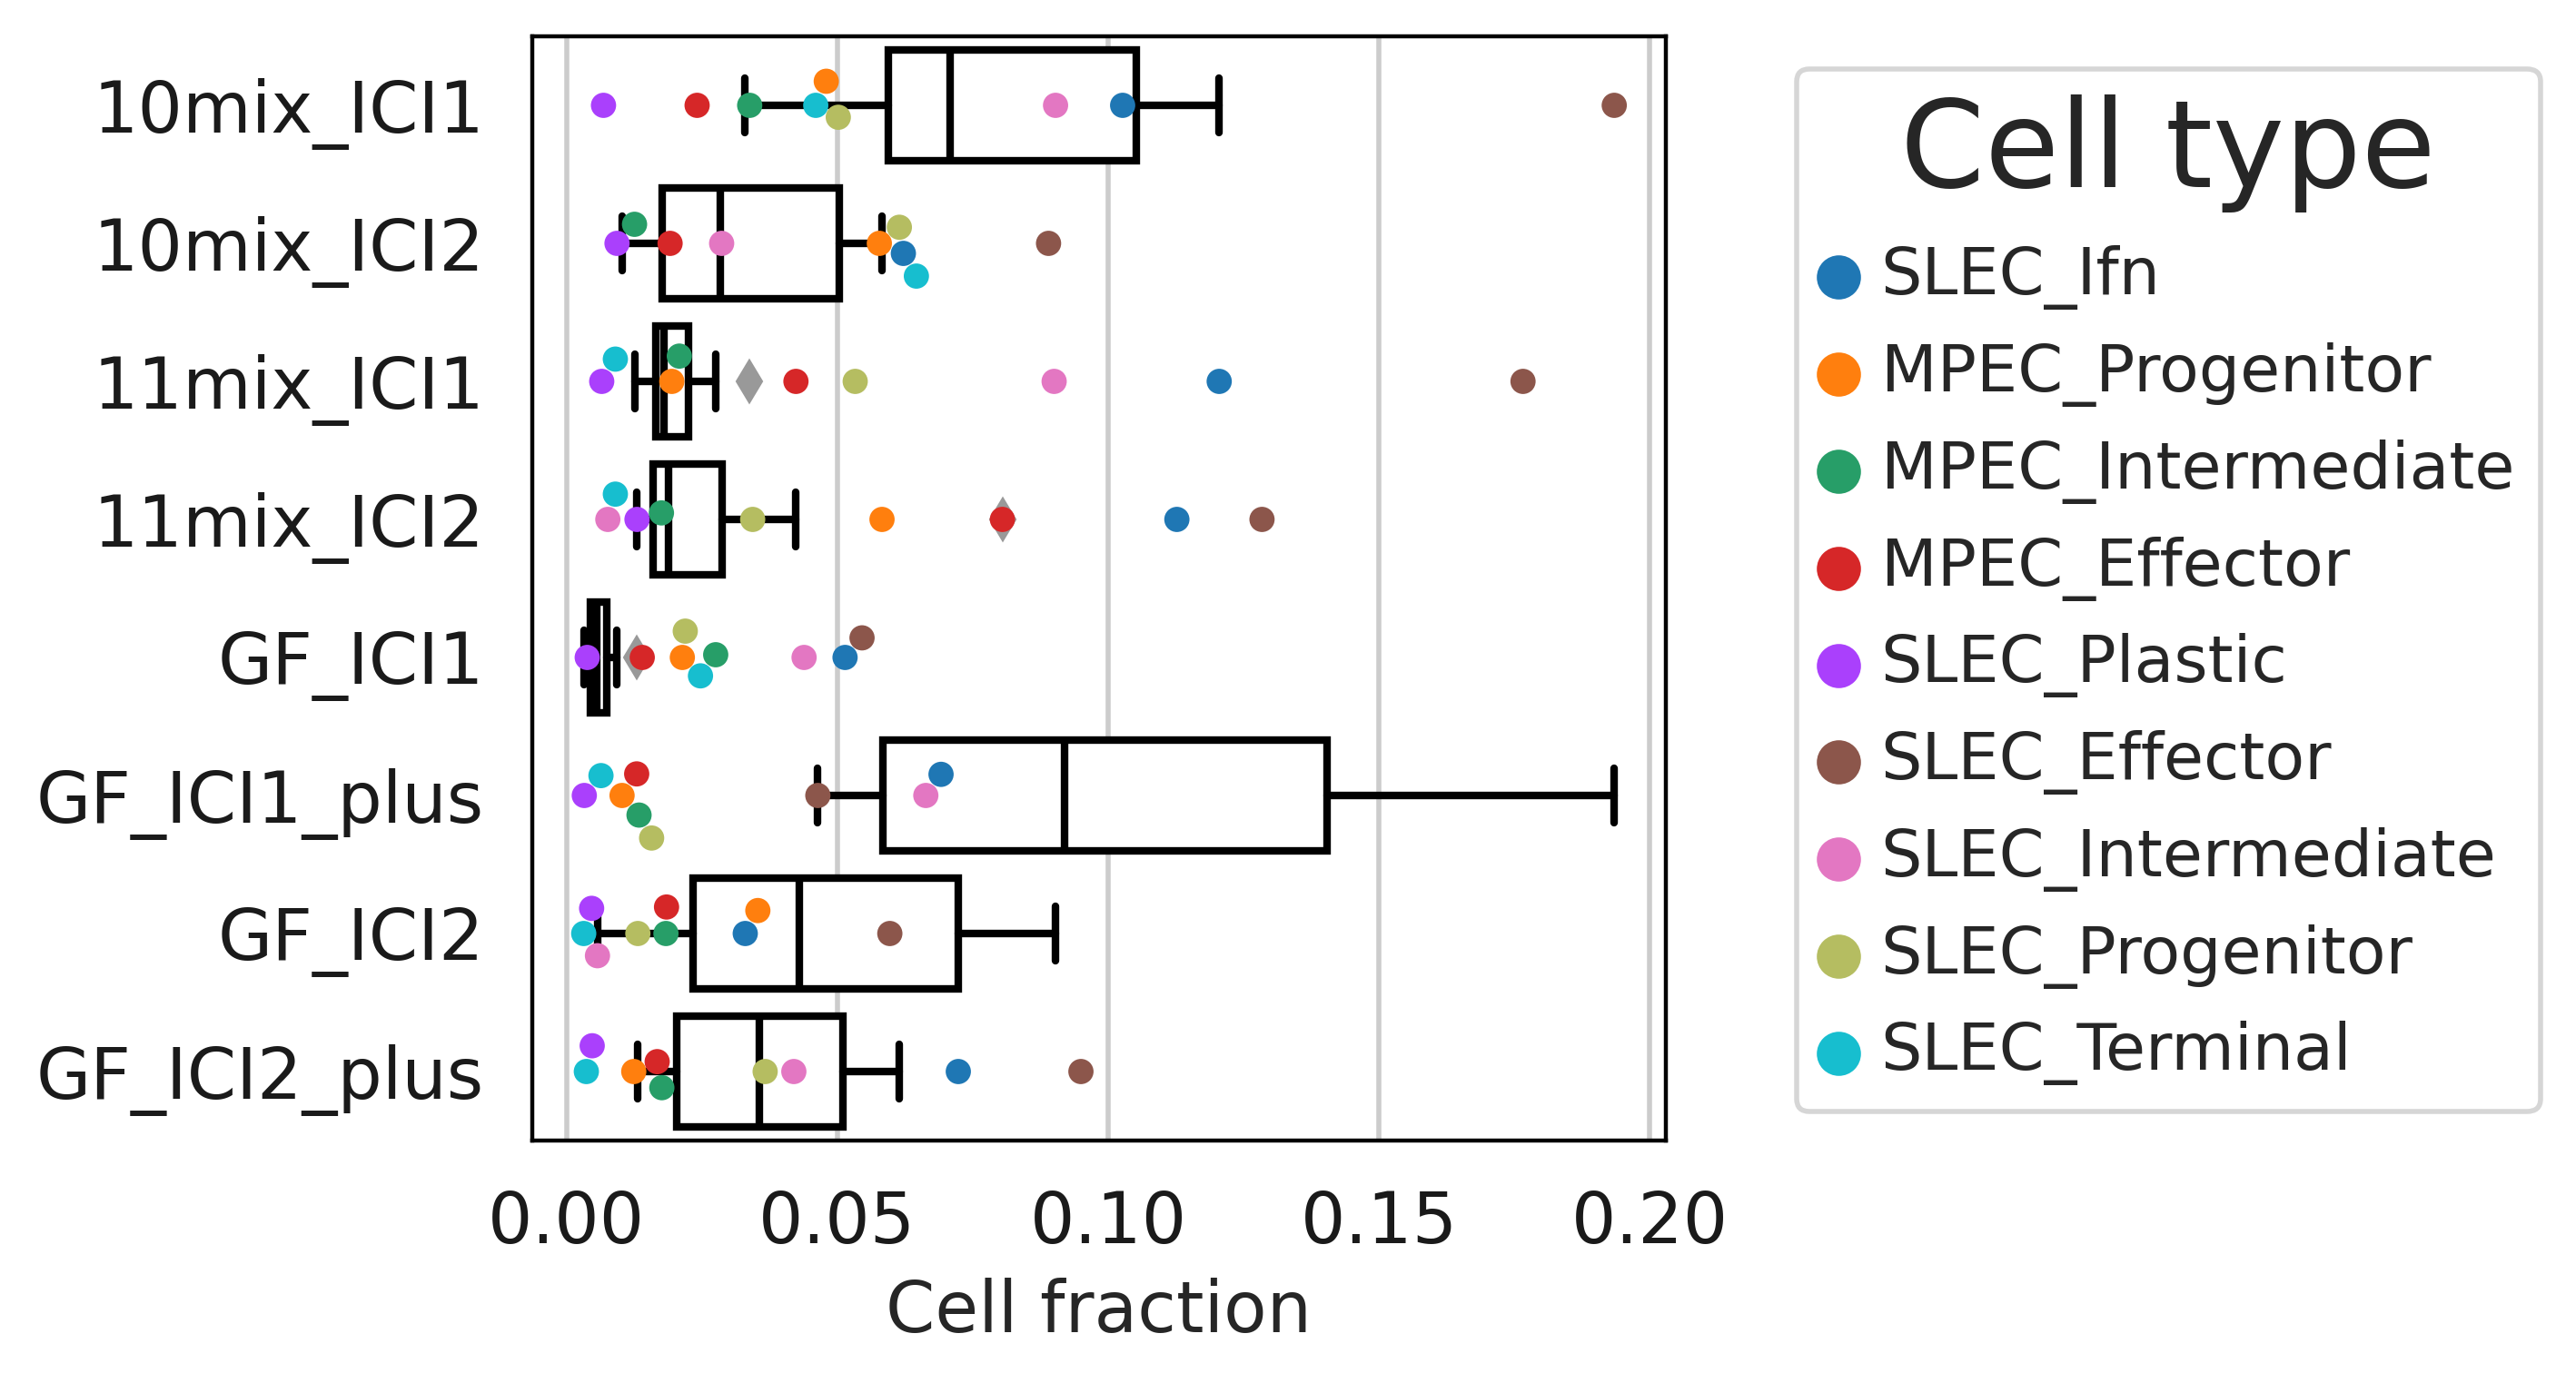

In [30]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_fraction', y='cell_type', data=df_num, color='white',
            boxprops=dict(edgecolor='black'), # Set box edge color
            whiskerprops=dict(color='black'), # Set whisker color
            capprops=dict(color='black'), # Set cap color
            medianprops=dict(color='black') # Set median line color
           )
ax = sns.swarmplot(x="cell_fraction", y="sample_id",hue="cell_type",data=df_num)
ax.legend(title='Cell type', bbox_to_anchor=(1.8,1), loc='upper right')
plt.xlabel("Cell fraction")
plt.ylabel("")

Text(0, 0.5, '')

<Figure size 2000x1200 with 0 Axes>

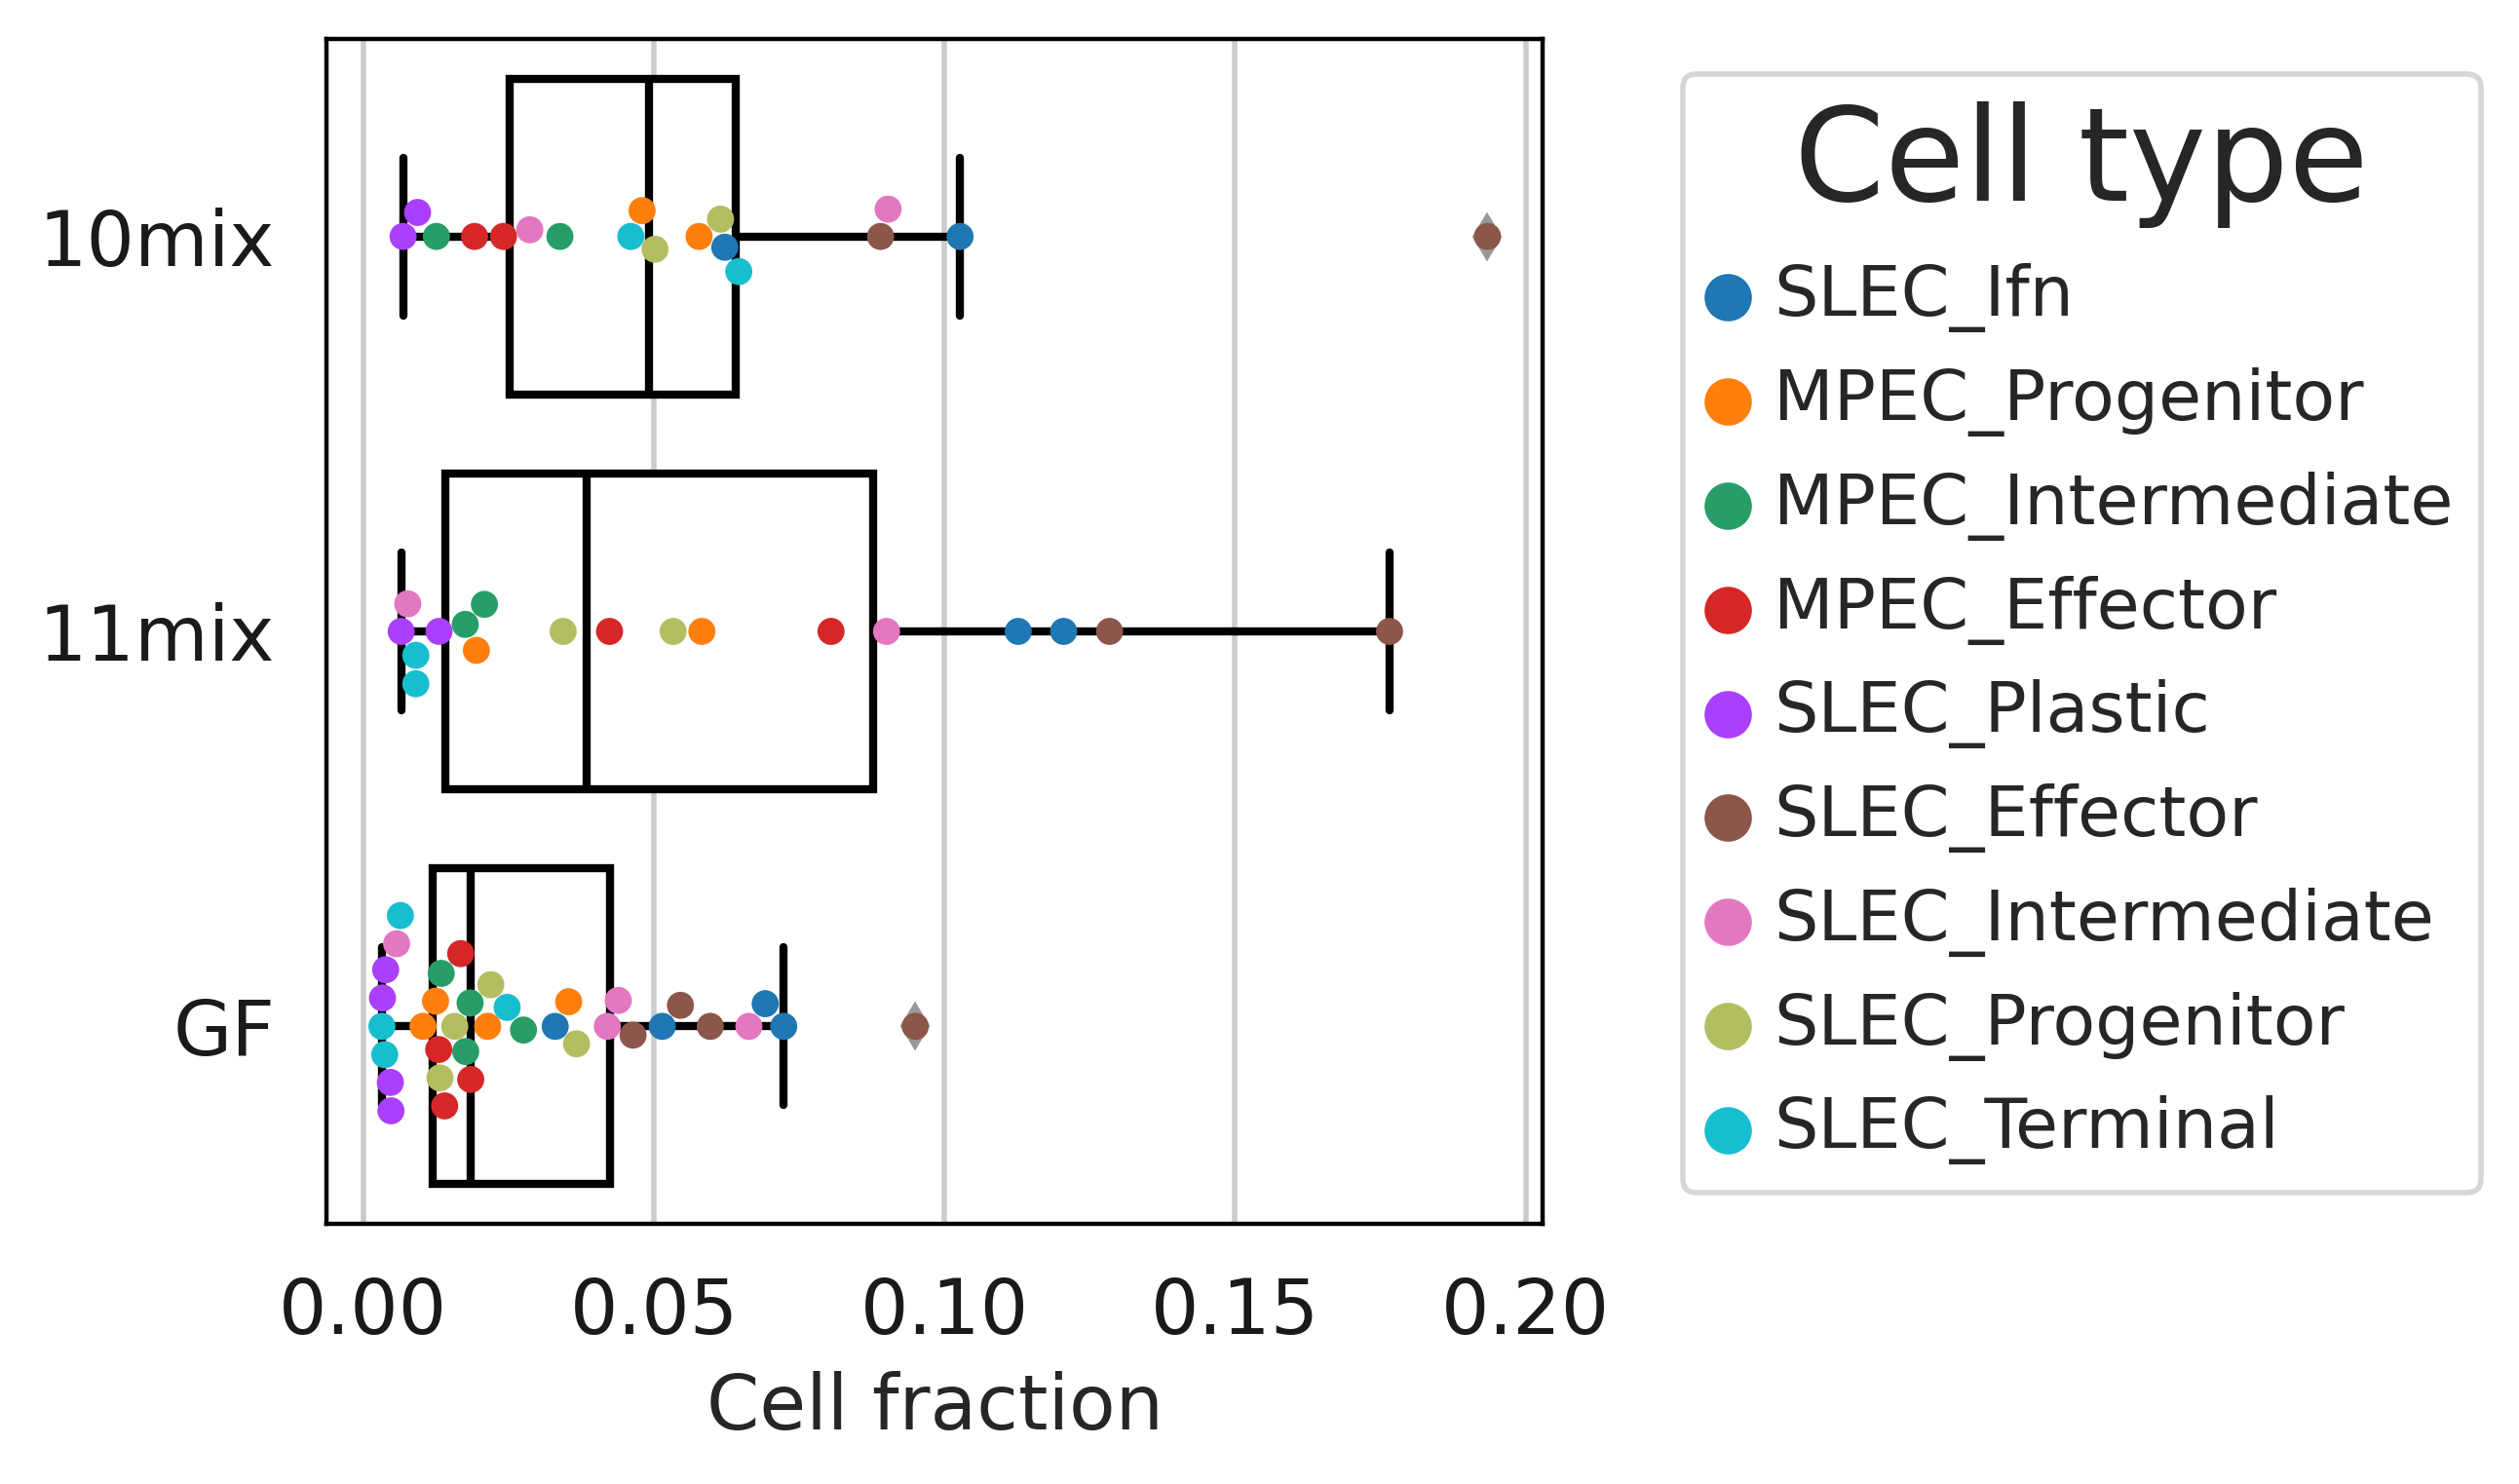

In [31]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_fraction', y='condition', data=df_num, color='white',
            boxprops=dict(edgecolor='black'), # Set box edge color
            whiskerprops=dict(color='black'), # Set whisker color
            capprops=dict(color='black'), # Set cap color
            medianprops=dict(color='black') # Set median line color
           )
ax = sns.swarmplot(x="cell_fraction", y="condition",hue="cell_type",data=df_num)
ax.legend(title='Cell type', bbox_to_anchor=(1.8,1), loc='upper right')
plt.xlabel("Cell fraction")
plt.ylabel("")

Text(0, 0.5, '')

<Figure size 2000x1200 with 0 Axes>

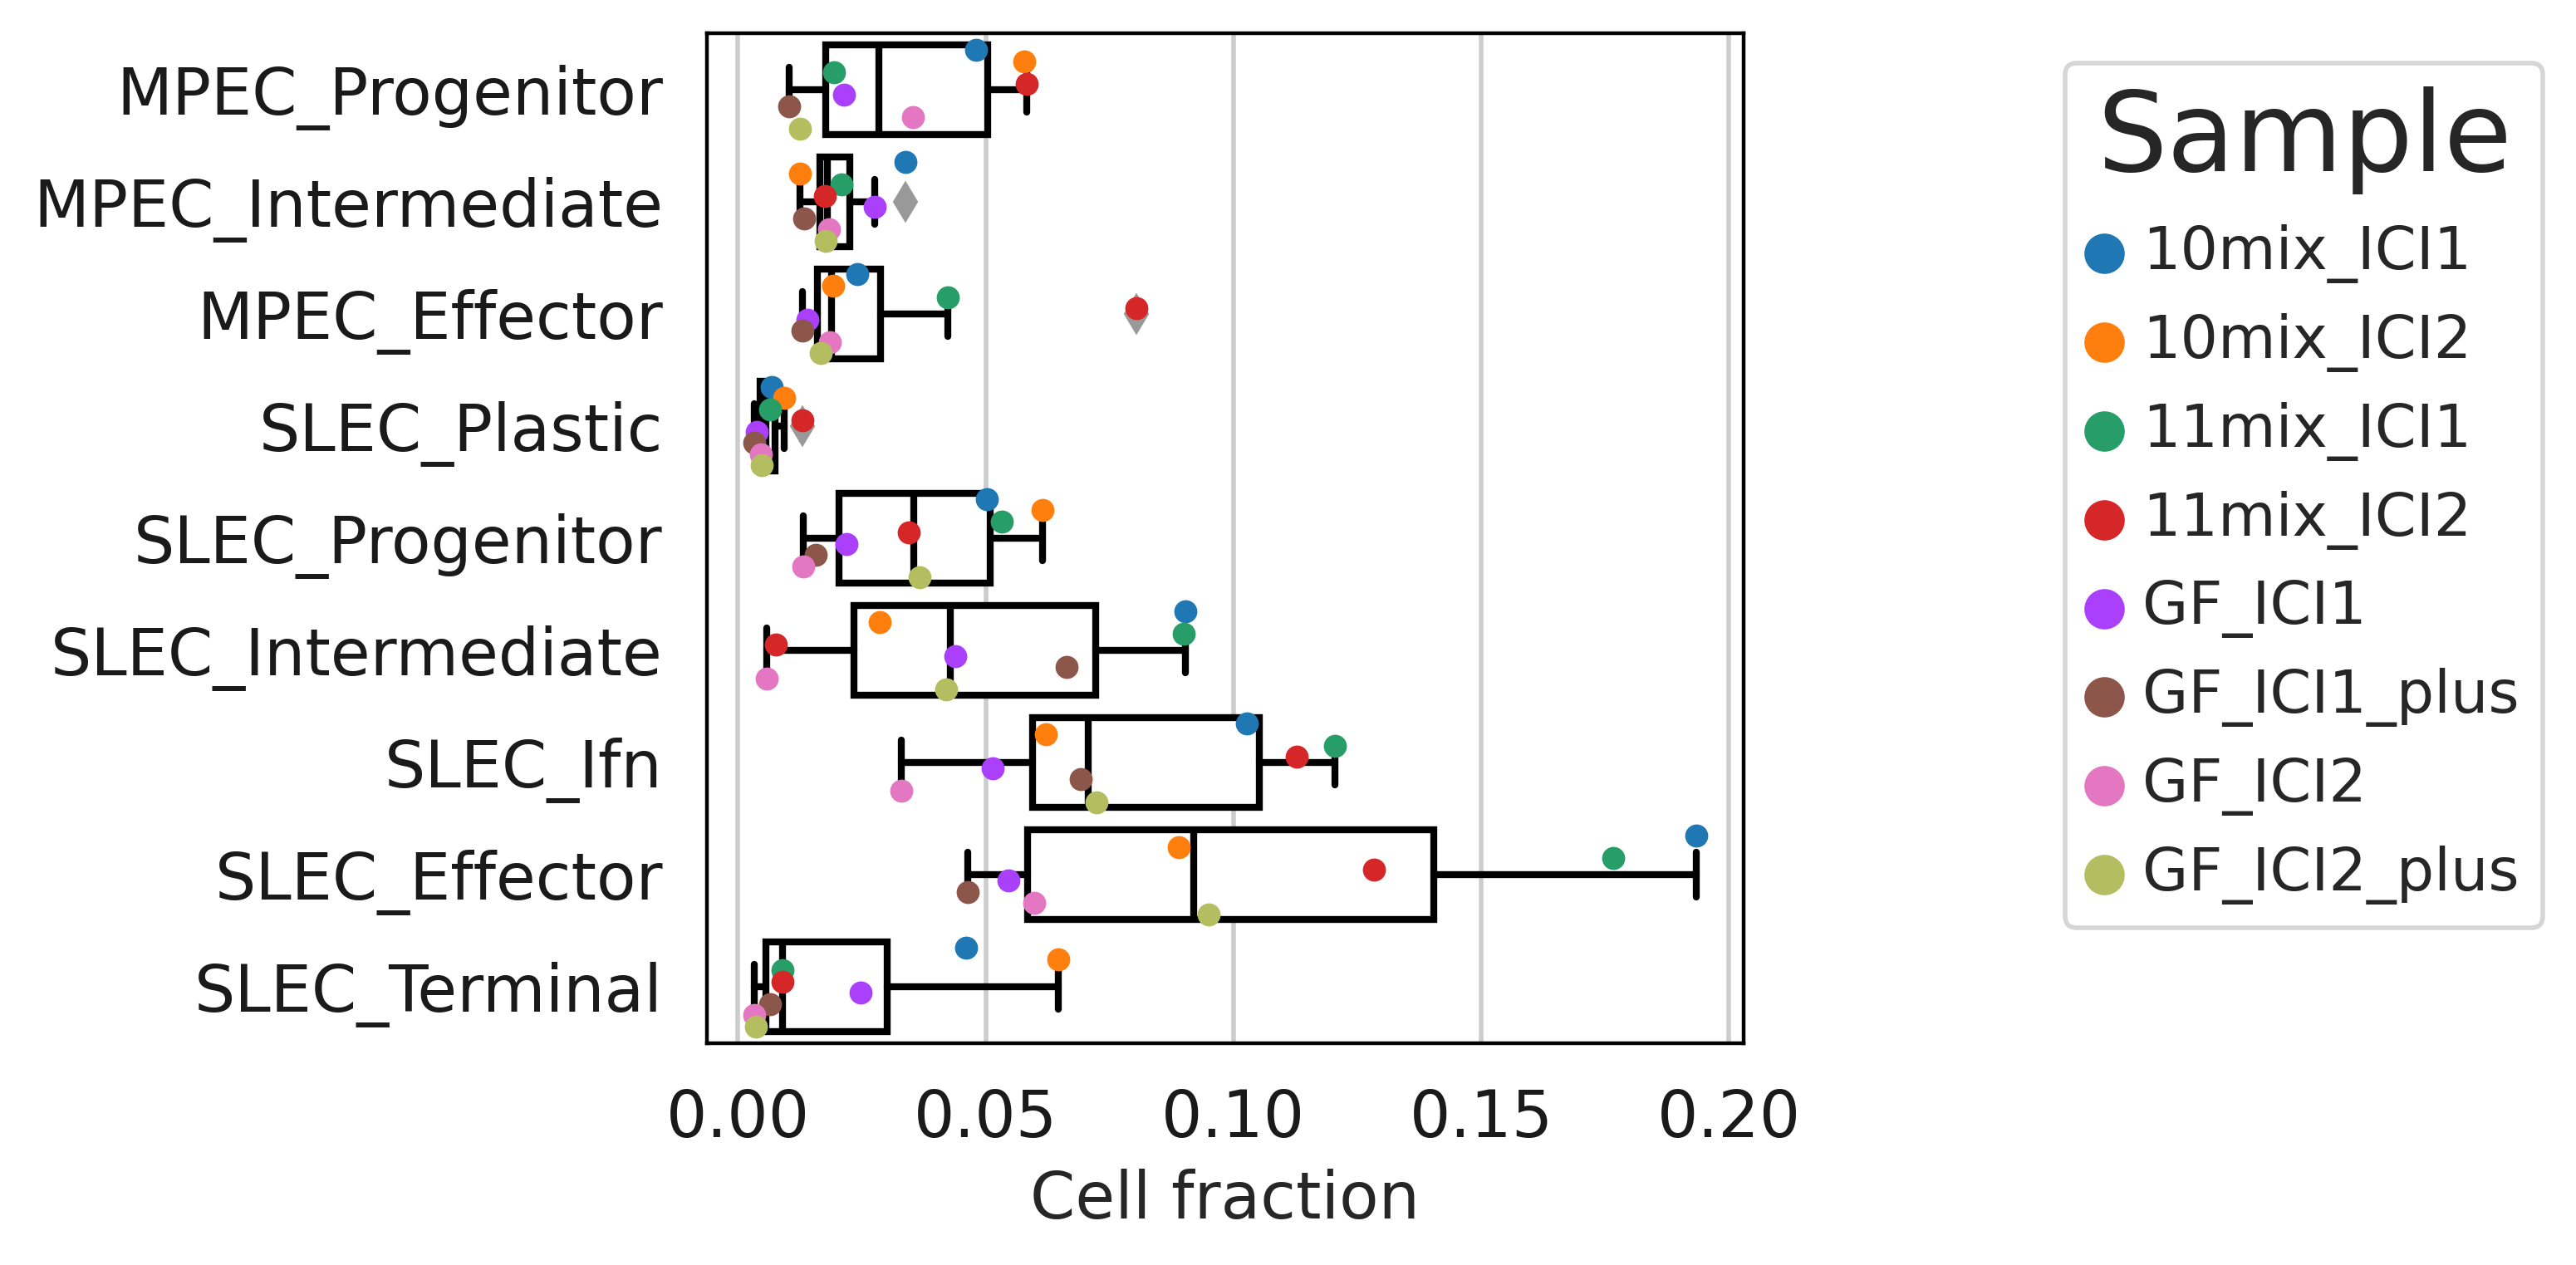

In [32]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_fraction', y='cell_type', data=df_num, color='white',order=order_list,
            boxprops=dict(edgecolor='black'), # Set box edge color
            whiskerprops=dict(color='black'), # Set whisker color
            capprops=dict(color='black'), # Set cap color
            medianprops=dict(color='black') # Set median line color
           )
ax = sns.swarmplot(x="cell_fraction", y="cell_type",hue="sample_id",data=df_num,dodge=True,order=order_list)
ax.legend(title='Sample', bbox_to_anchor=(1.8,1), loc='upper right')
plt.xlabel("Cell fraction")
plt.ylabel("")

/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kvalem/.conda/envs/scanpy/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, '')

<Figure size 2000x1200 with 0 Axes>

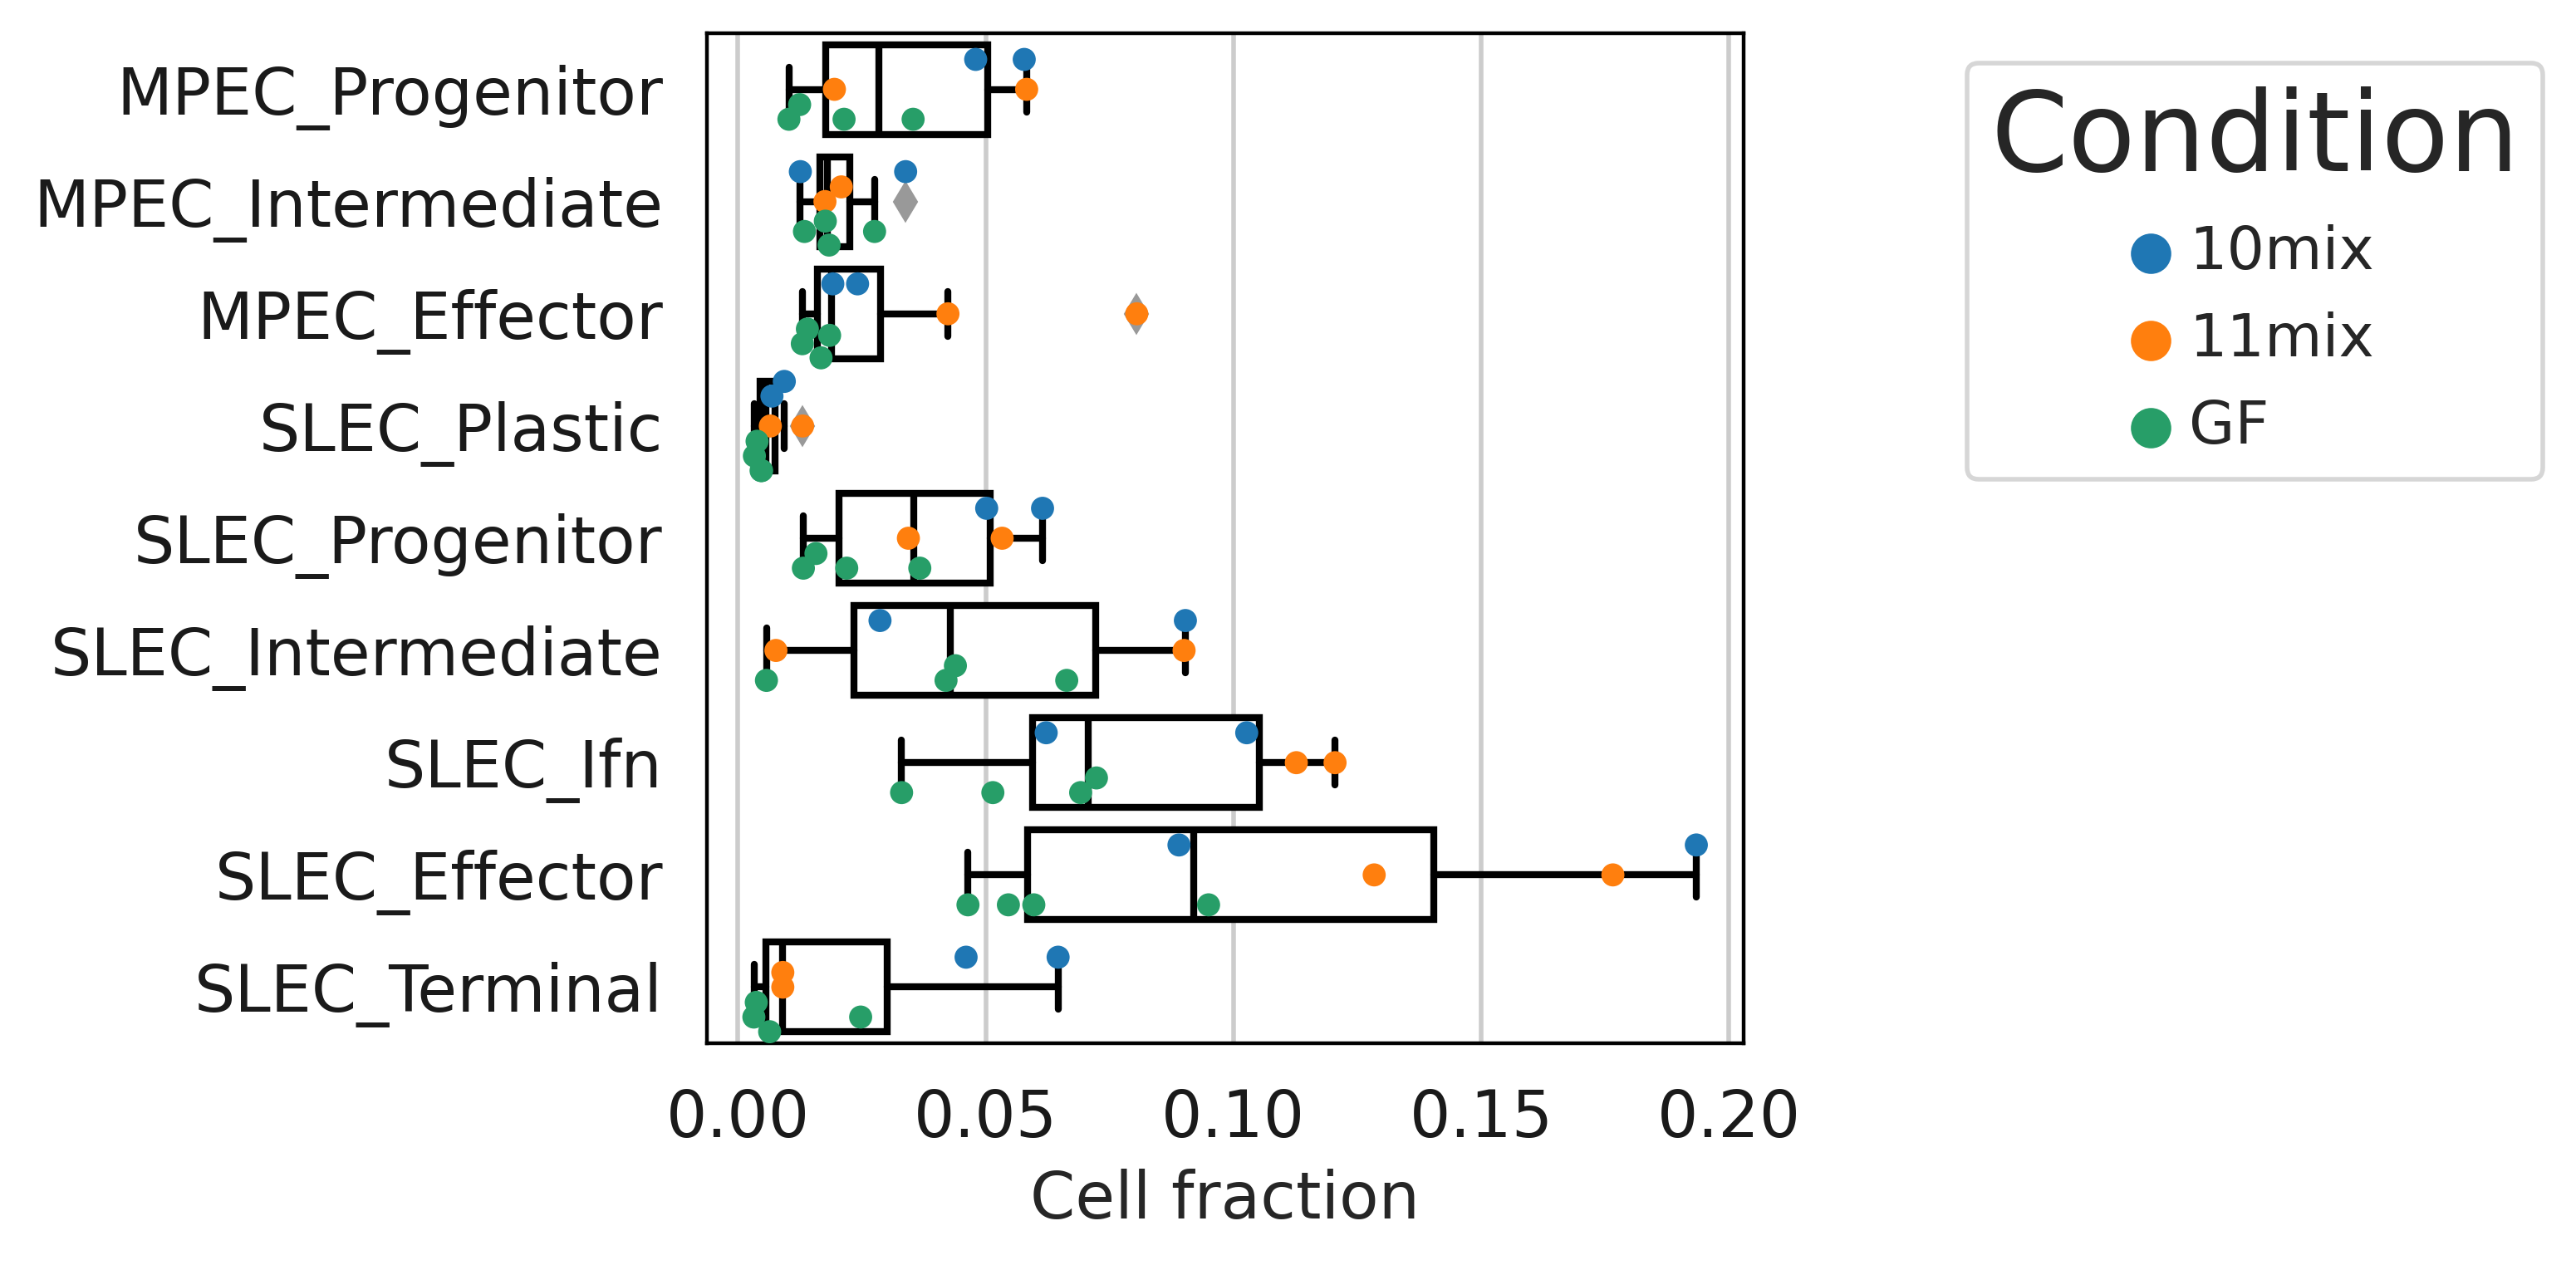

In [33]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_fraction', y='cell_type', data=df_num, color='white',order=order_list,
            boxprops=dict(edgecolor='black'), # Set box edge color
            whiskerprops=dict(color='black'), # Set whisker color
            capprops=dict(color='black'), # Set cap color
            medianprops=dict(color='black') # Set median line color
           )
ax = sns.swarmplot(x="cell_fraction", y="cell_type",hue="condition",data=df_num,dodge=True,order=order_list)
ax.legend(title='Condition', bbox_to_anchor=(1.8,1), loc='upper right')
plt.xlabel("Cell fraction")
plt.ylabel("")

In [34]:

# Create a subset where 'condition' is '10mix'
df_num_10mix = df_num[df_num['condition'] == '10mix']
df_num_11mix = df_num[df_num['condition'] == '11mix']

In [35]:
df_num_10mix

sample_id condition          cell_type cell_type2  cell_count  \
0   10mix_ICI1     10mix      SLEC_Effector      SLEC5        2093   
9   10mix_ICI1     10mix           SLEC_Ifn      SLEC4        1111   
13  10mix_ICI1     10mix  SLEC_Intermediate      SLEC3         977   
14  10mix_ICI2     10mix      SLEC_Effector      SLEC5         963   
20  10mix_ICI2     10mix      SLEC_Terminal      SLEC6         699   
22  10mix_ICI2     10mix           SLEC_Ifn      SLEC4         673   
24  10mix_ICI2     10mix    SLEC_Progenitor      SLEC2         665   
26  10mix_ICI2     10mix    MPEC_Progenitor      MPEC1         625   
29  10mix_ICI1     10mix    SLEC_Progenitor      SLEC2         543   
30  10mix_ICI1     10mix    MPEC_Progenitor      MPEC1         519   
32  10mix_ICI1     10mix      SLEC_Terminal      SLEC6         498   
38  10mix_ICI1     10mix  MPEC_Intermediate      MPEC2         366   
43  10mix_ICI2     10mix  SLEC_Intermediate      SLEC3         310   
45  10mix_ICI1     10mix      MPEC_Effector      MPEC3         261   
53  10mix_ICI2     10mix      MPEC_Effector      MPEC3         207   
57  10mix_ICI2     10mix  MPEC_Intermediate      MPEC2         136   
62  10mix_ICI2     10mix       SLEC_Plastic      SLEC1         101   
67  10mix_ICI1     10mix       SLEC_Plastic      SLEC1          74   

    total_cell_count  cell_fraction  
0              10821       0.193420  
9              10821       0.102671  
13             10821       0.090287  
14             10821       0.088994  
20             10821       0.064597  
22             10821       0.062194  
24             10821       0.061455  
26             10821       0.057758  
29             10821       0.050180  
30             10821       0.047962  
32             10821       0.046022  
38             10821       0.033823  
43             10821       0.028648  
45             10821       0.024120  
53             10821       0.019129  
57             10821       0.012568  
62             10821       0.009334  
67             10821       0.006839

Text(0.5, 1.0, '10mix')

<Figure size 2000x1200 with 0 Axes>

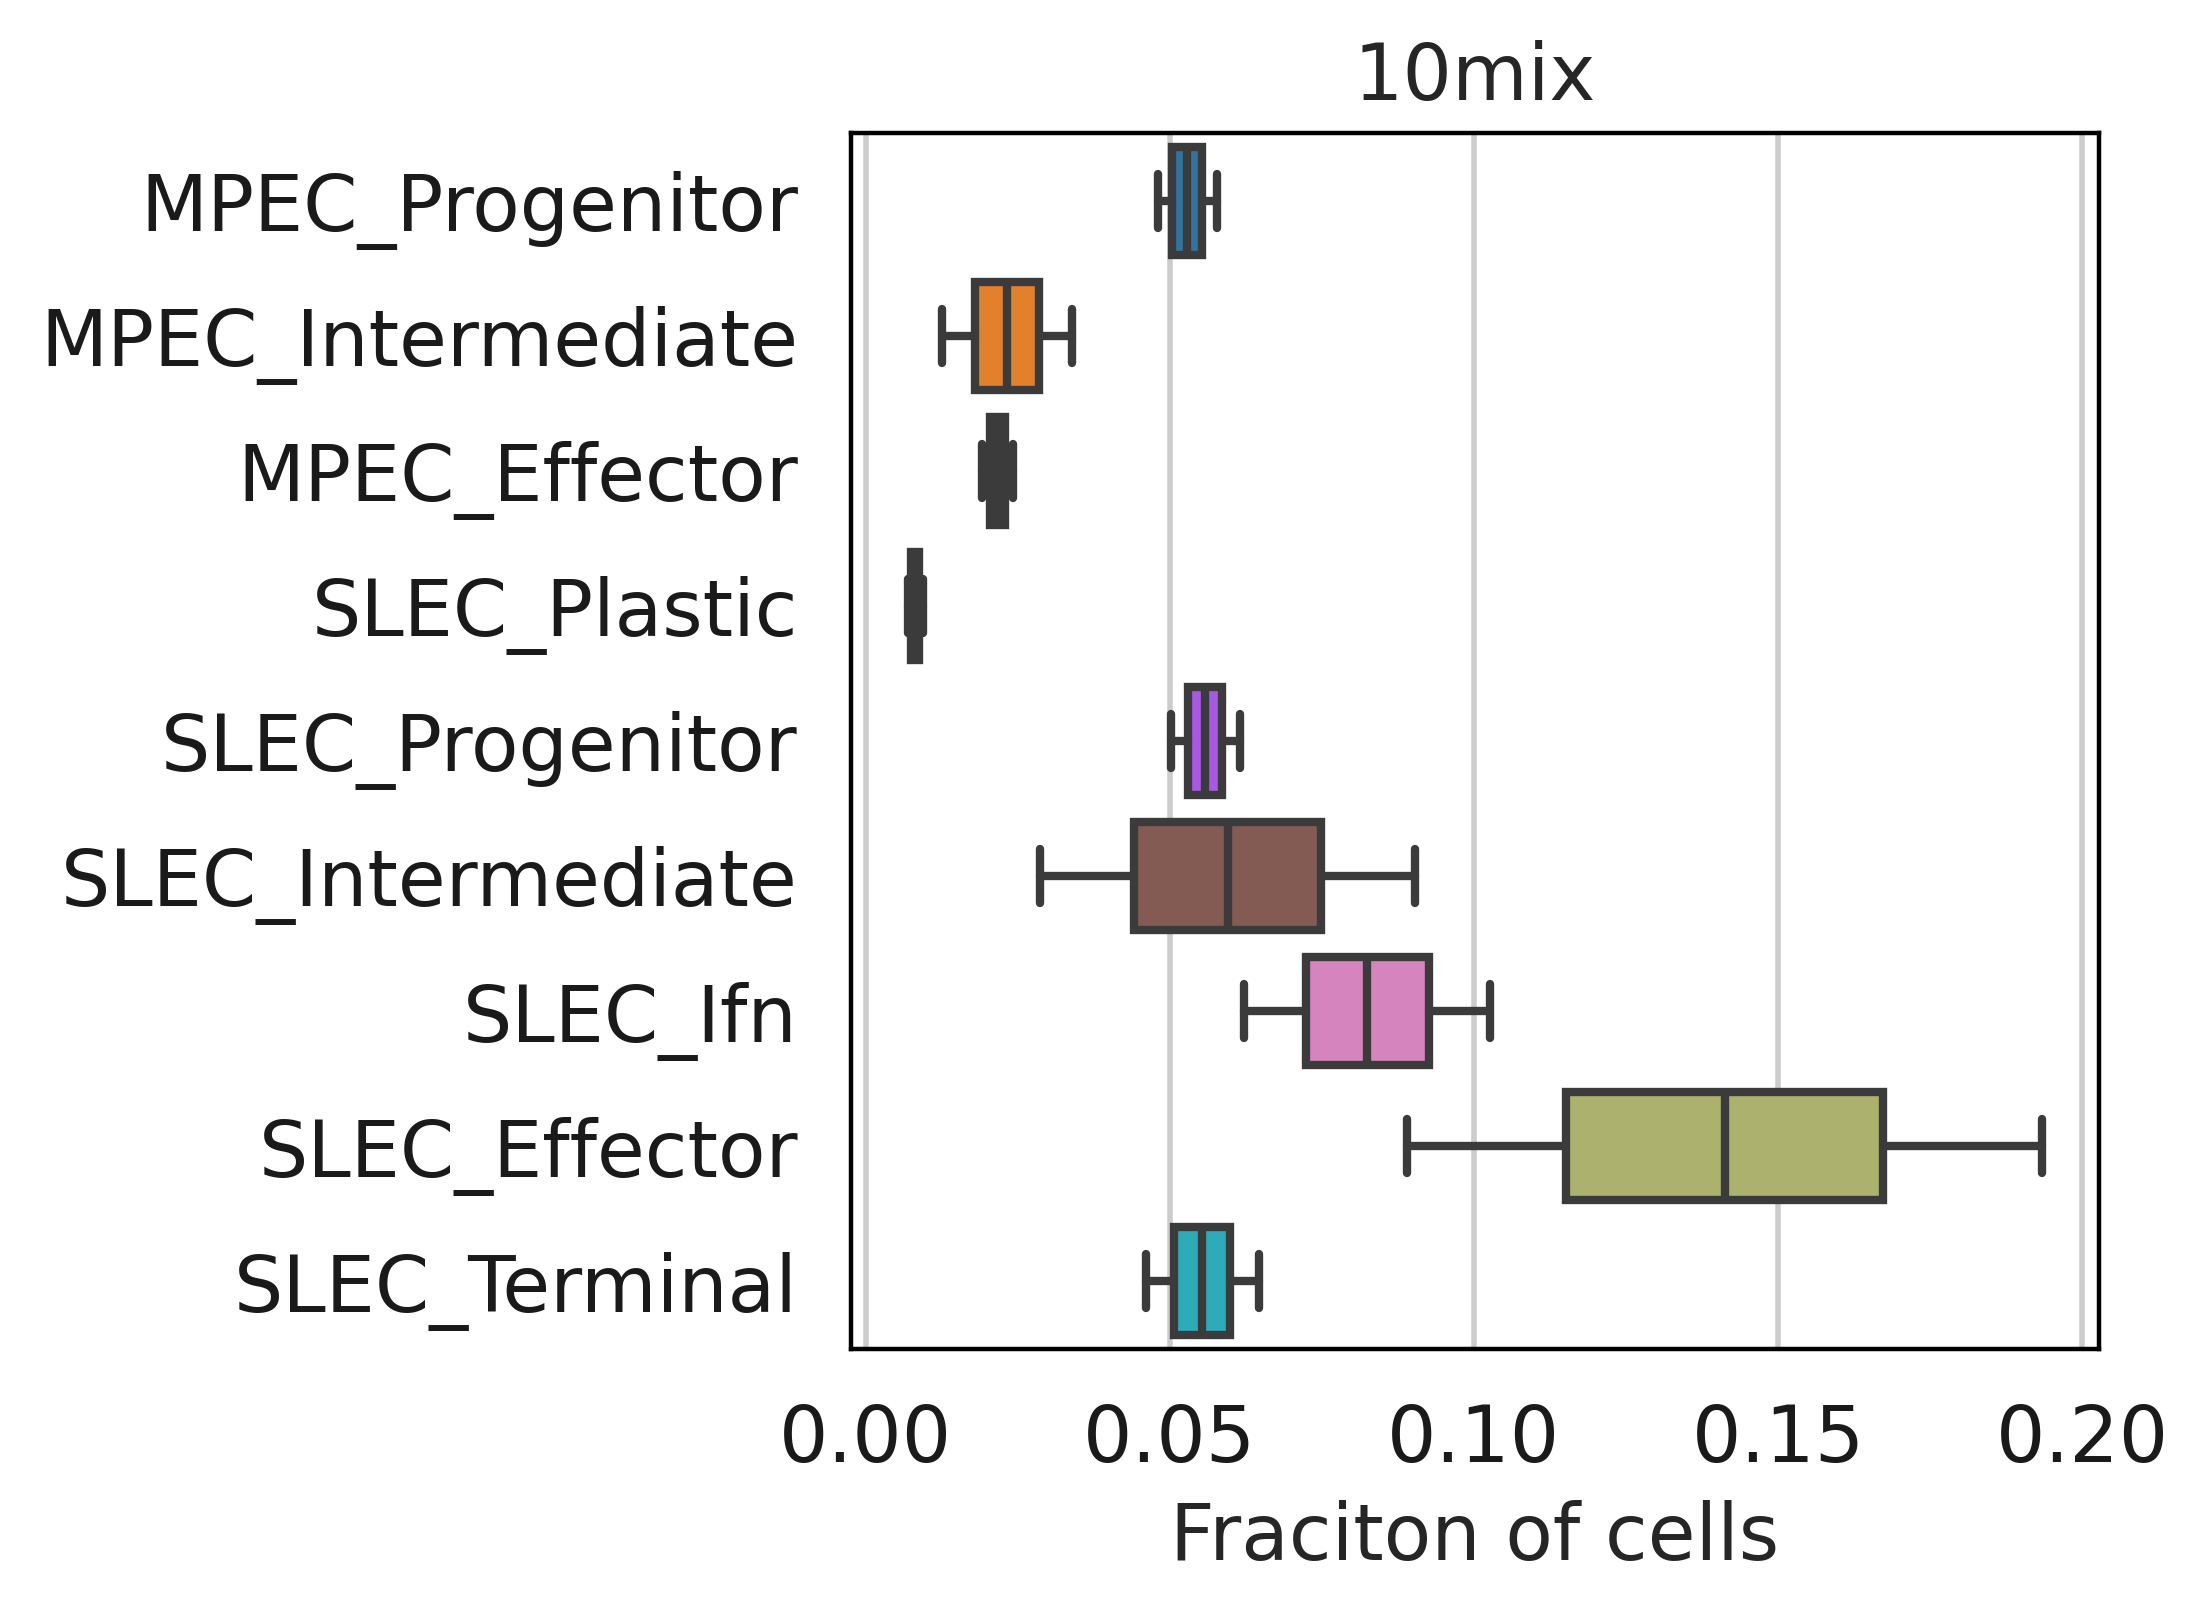

In [36]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_fraction', y='cell_type', data=df_num_10mix,order=order_list) # Set median line color
plt.xlabel("Fraciton of cells")
plt.ylabel("")
plt.title("10mix")

Text(0.5, 1.0, '11mix')

<Figure size 2000x1200 with 0 Axes>

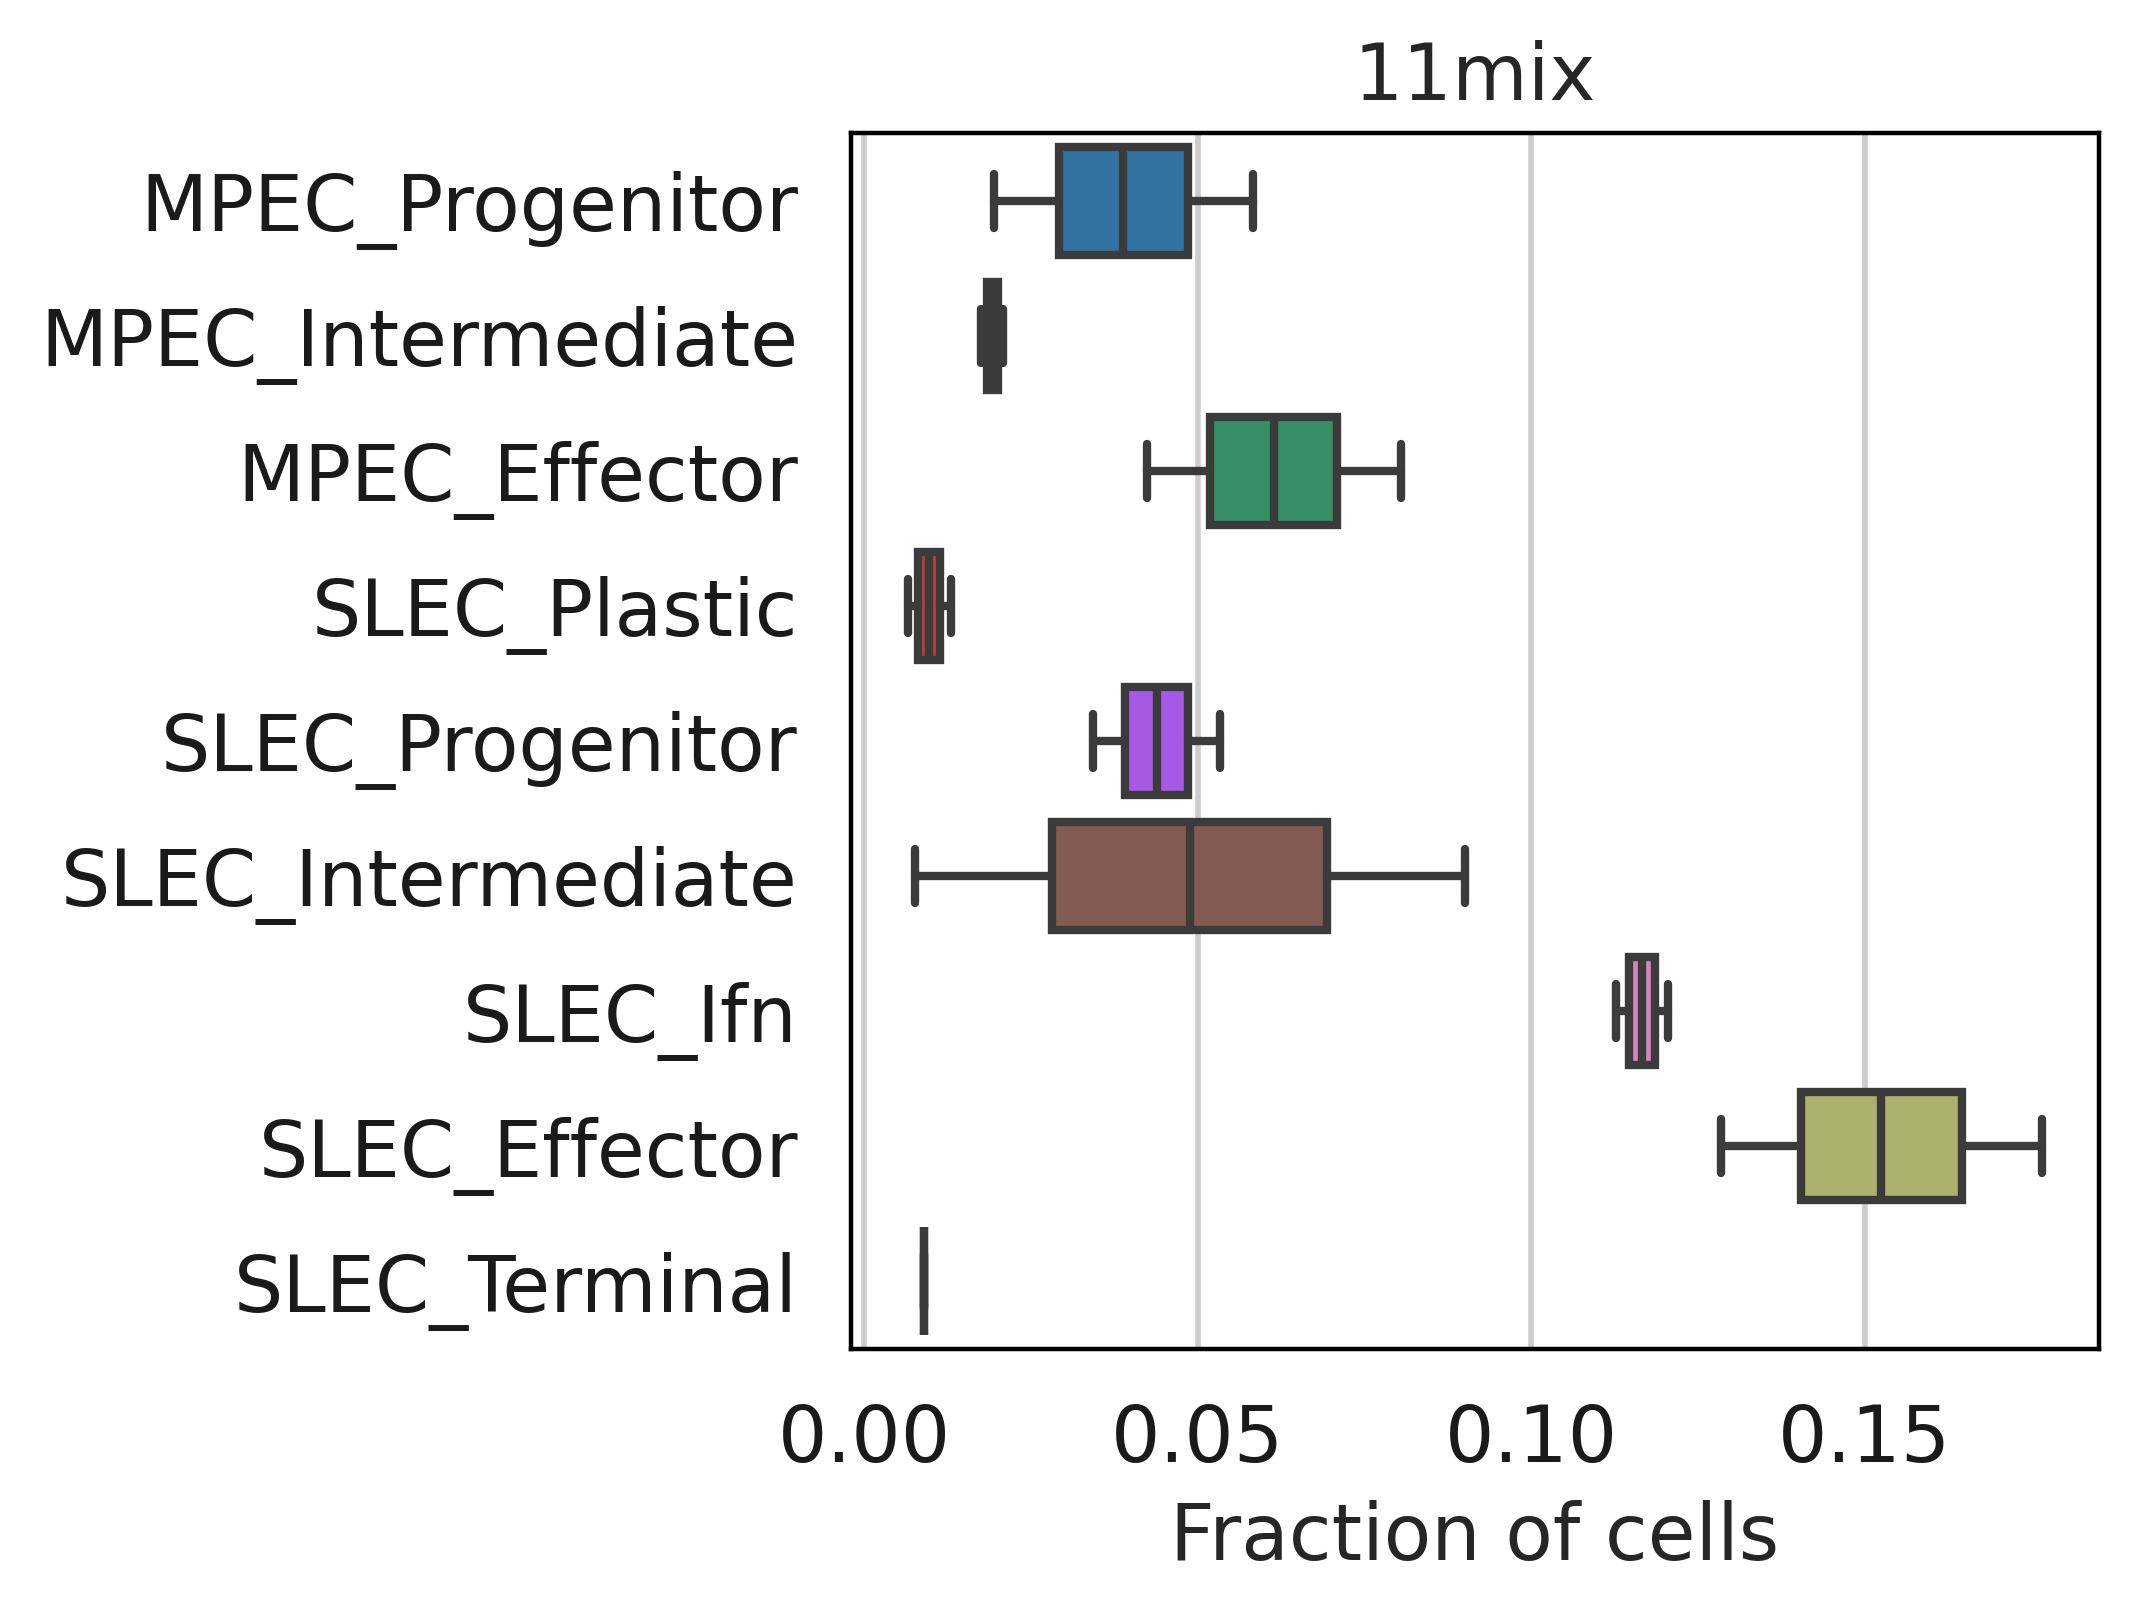

In [37]:
plt.figure(figsize=(10, 6))
f, ax = plt.subplots(1)
sns.boxplot(x='cell_fraction', y='cell_type', data=df_num_11mix,order=order_list) # Set median line color

plt.xlabel("Fraction of cells")
plt.ylabel("")
plt.title("11mix")